# 1. Data Collection & Initial Analysis

- In this step, first of all, we will import the essential libraries and after that we will load the dataset and perform initial data analysis to gain insights into its structure and contents.

In [1]:
# Importing essential libraries for data exploration and analysis.

# Importing NumPy for numerical computations.
import numpy as np
# Importing Pandas for data manipulation and analysis.
import pandas as pd
# Importing Matplotlib for data visualization.
import seaborn as sns
# Importing StandardScaler from scikit-learn for feature scaling.
import matplotlib.pyplot as plt
# Importing Seaborn for enhanced data visualization.
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the excel dataset using the Pandas library.
# The 'header=0' argument indicates that the first row contains column names.
df = pd.read_excel("D:/DSPGC/5. Interview Preparation/sydney_rain prediction.xlsx", header = 0)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
# Displaying Information About the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

### Observations About the Data:

- The dataset comprises 3337 entries.
- It consists of 17 columns, each representing a distinct attribute.
- Multiple columns have missing values, such as MinTemp, MaxTemp, and Rainfall.
- Addressing these missing values through imputation is essential to prepare the data for analysis and modeling.


# 2. Data Preprocessing

In [5]:
# Step 1: One-Hot Encoding- In this step, we will perform one-hot encoding on categorical variables to change it into numerical values in the dataset.
# The 'drop_first=True' argument drops the first category of each variable to avoid.

df = pd.get_dummies(df, drop_first=True)

In [6]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [7]:
# Step 2: Missing Value Imputation

# In this step, we will handle missing values in the dataset by imputing them with
# appropriate values (e.g., mean, median) based on the nature of each column.

# Impute missing values for numeric columns using appropriate strategies.
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace=True)
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].median(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].median(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].median(), inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   MinTemp           3337 non-null   float64       
 2   MaxTemp           3337 non-null   float64       
 3   Rainfall          3337 non-null   float64       
 4   Evaporation       3337 non-null   float64       
 5   Sunshine          3337 non-null   float64       
 6   Humidity9am       3337 non-null   float64       
 7   Humidity3pm       3337 non-null   float64       
 8   Pressure9am       3337 non-null   float64       
 9   Pressure3pm       3337 non-null   float64       
 10  Cloud9am          3337 non-null   float64       
 11  Cloud3pm          3337 non-null   float64       
 12  Temp9am           3337 non-null   float64       
 13  Temp3pm           3337 non-null   float64       
 14  RainToday_Yes     3337 n

### Outlier Treatment

In [9]:
# Exploratory Data Analysis (EDA): To display the summary statistics for numerical columns in the dataset.
# The result is transposed for a more readable format.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,3337.0,14.865057,4.551593,4.3,11.0,14.9,18.7,27.6
MaxTemp,3337.0,23.002339,4.493290,11.7,19.6,22.8,26.0,45.8
Rainfall,3337.0,3.330231,9.886270,0.0,0.0,0.0,1.4,119.4
Evaporation,3337.0,5.181510,2.756505,0.0,3.2,4.8,7.0,18.4
Sunshine,3337.0,7.179374,3.801737,0.0,4.3,8.2,10.2,13.6
Humidity9am,3337.0,68.232245,15.053751,19.0,58.0,69.0,80.0,100.0
Humidity3pm,3337.0,54.704225,16.261954,10.0,44.0,56.0,64.0,99.0
Pressure9am,3337.0,1018.347678,7.000519,986.7,1013.8,1018.6,1023.1,1039.0
Pressure3pm,3337.0,1016.020375,7.012189,989.8,1011.3,1016.3,1020.8,1036.7
Cloud9am,3337.0,4.320348,2.524256,0.0,2.0,5.0,7.0,9.0


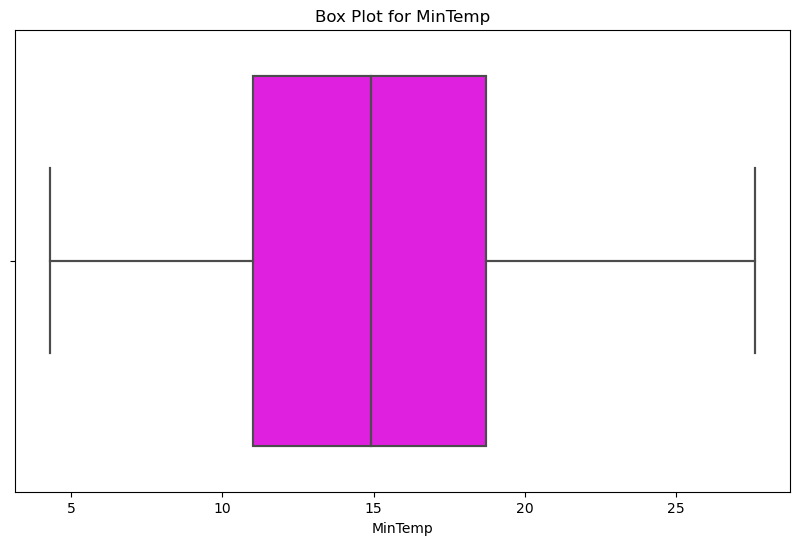

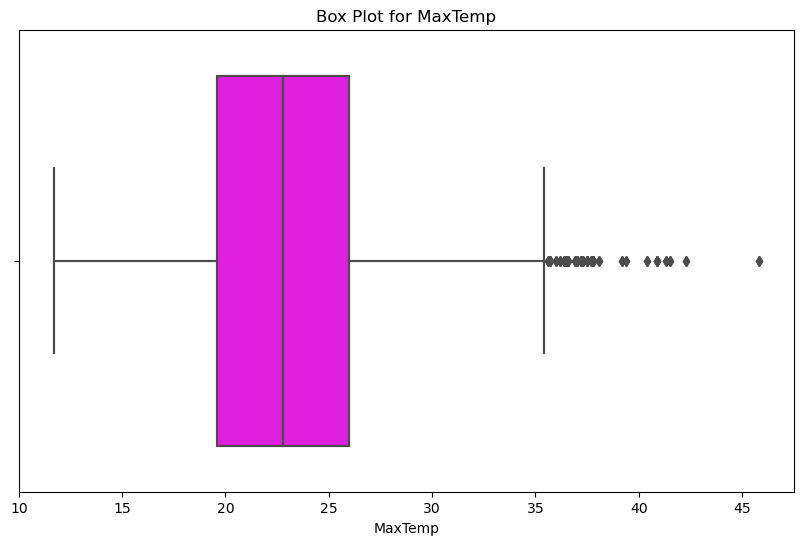

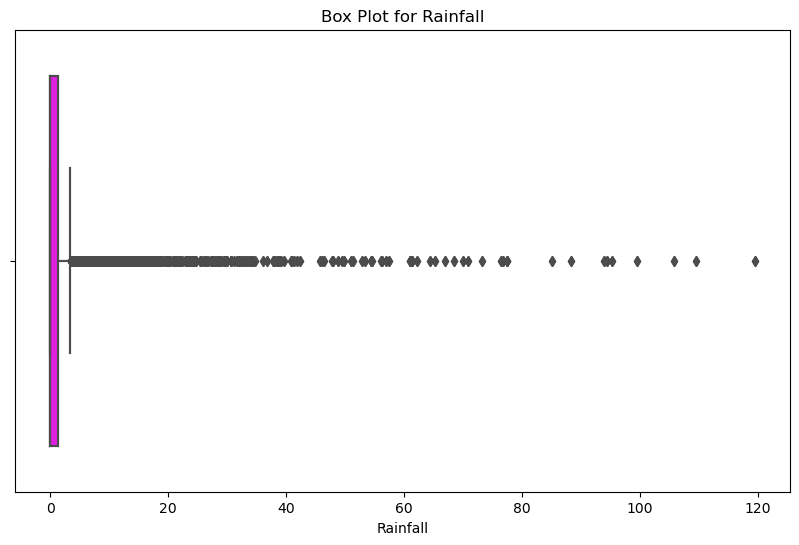

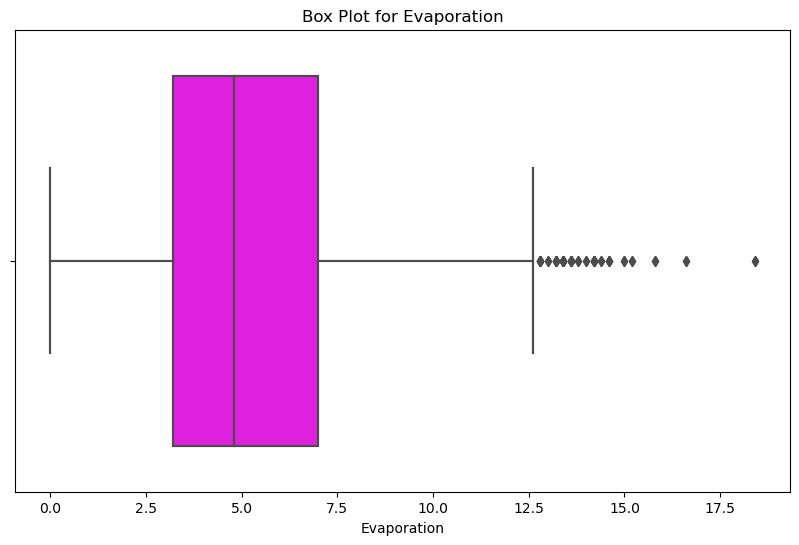

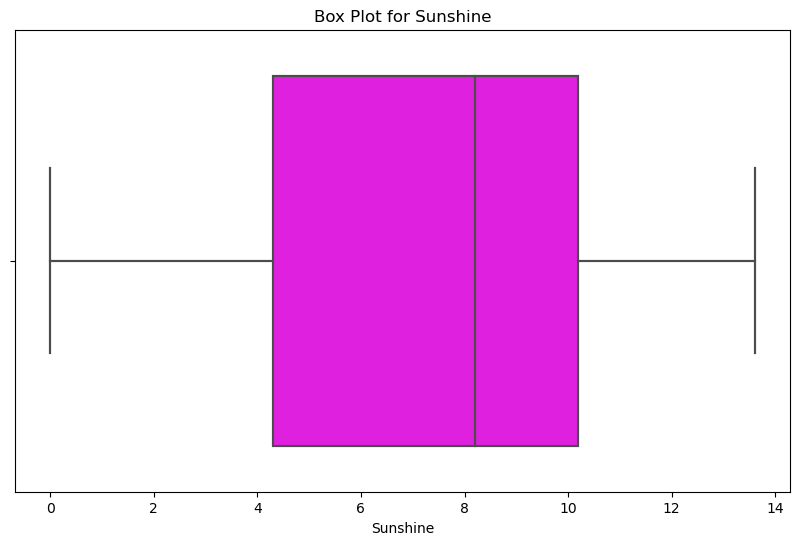

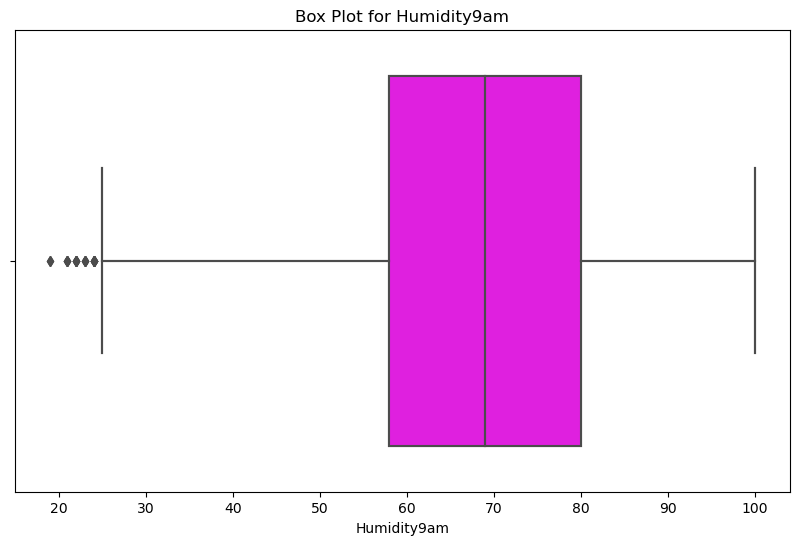

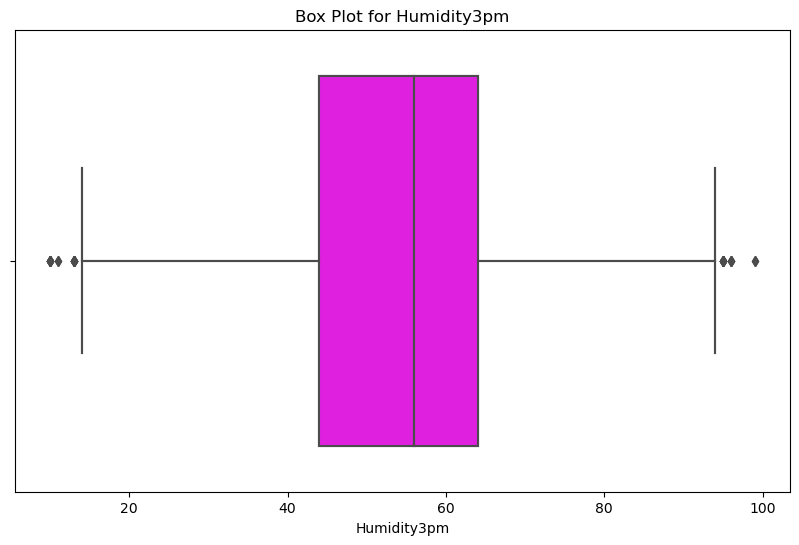

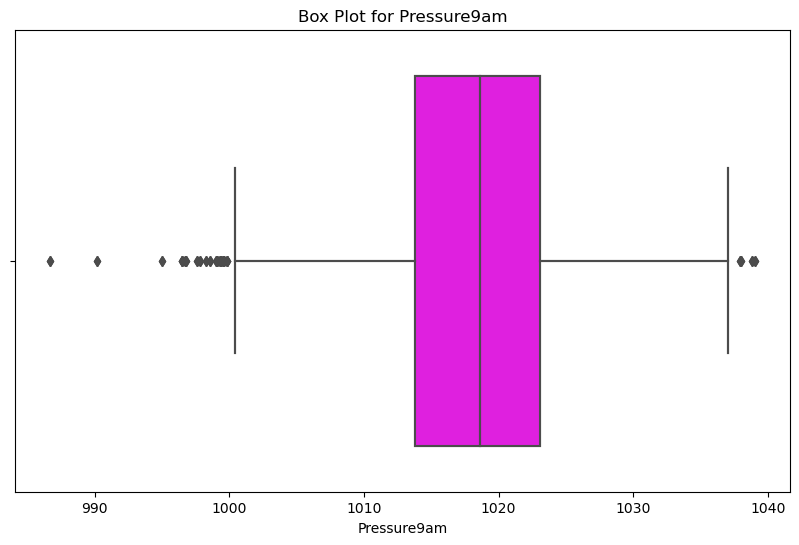

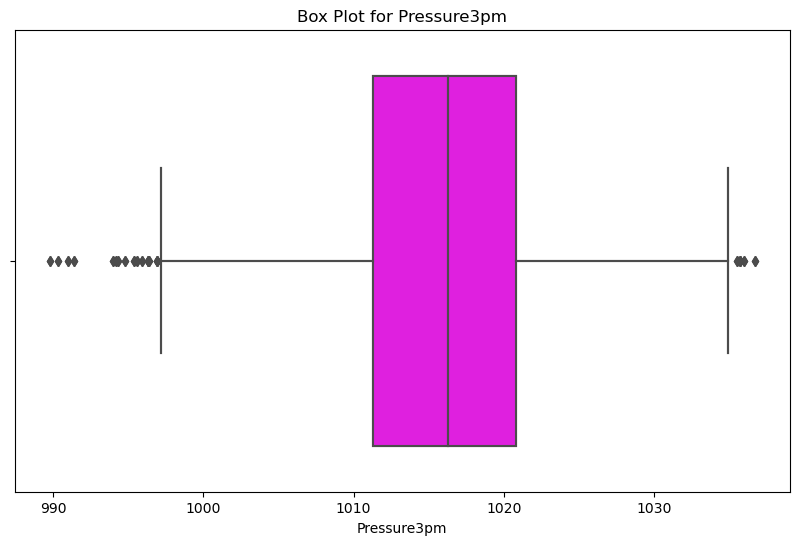

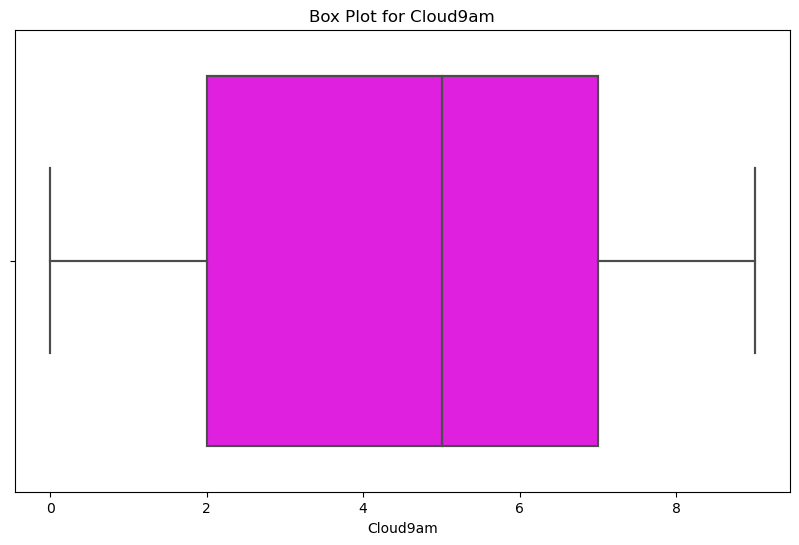

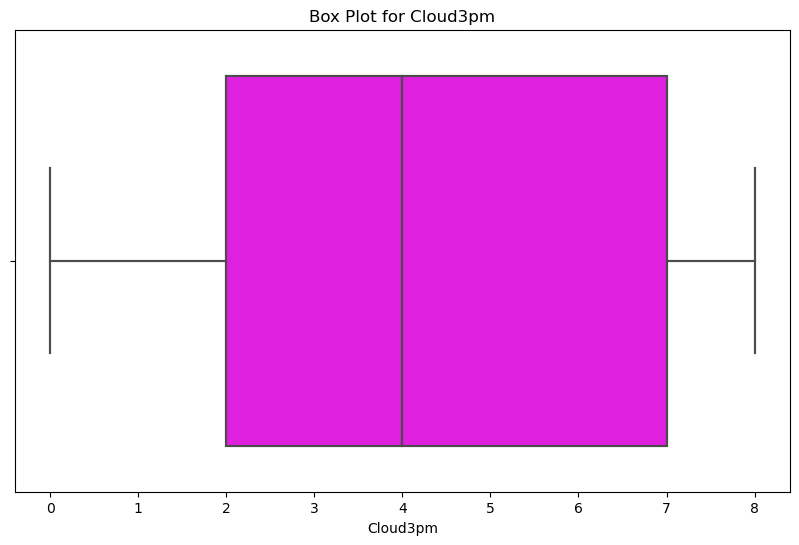

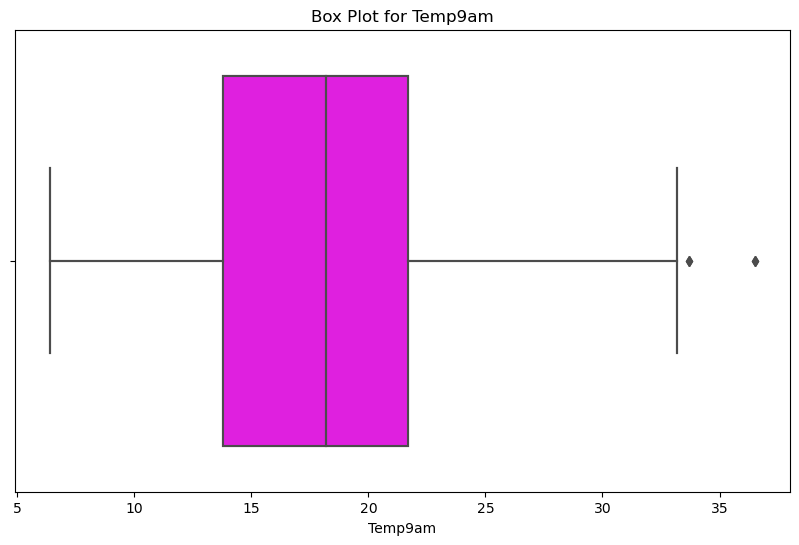

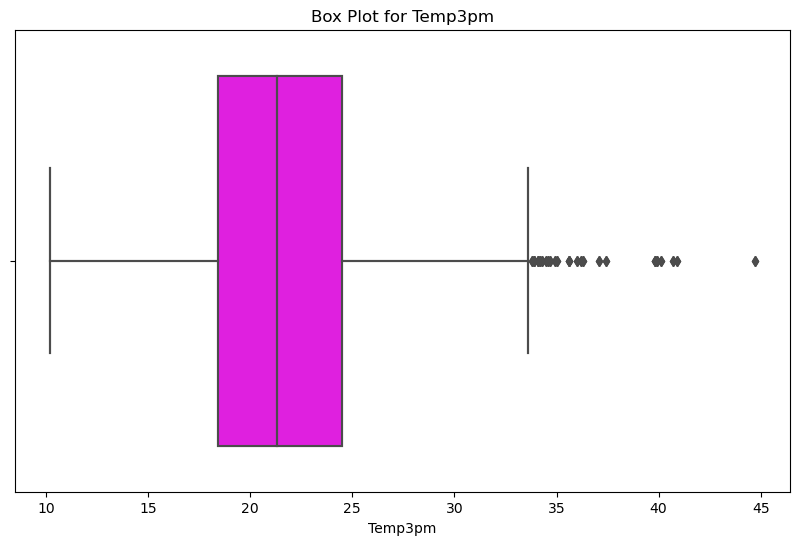

In [10]:
# List of numerical columns for which we want to create box plots
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                     'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
# Create box plots for each numerical feature
for feature in num_cols:
    # Create a new figure with a specified size
    plt.figure(figsize=(10, 6))
    
    # Copy the DataFrame to avoid modifying the original data
    df1 = df.copy()
    
    # Create a box plot for the current feature
    sns.boxplot(x=feature, data=df1)
    
    # Set the title for the box plot
    plt.title(f'Box Plot for {feature}')

    # Create a box plot for the current feature with Magenta color
    sns.boxplot(data=df1, x=feature, color='Magenta')
                
    # Display the box plot
    plt.show()

In [11]:
# Calculate the Interquartile Range (IQR) for the MaxTemp column.
IQR = df['MaxTemp'].quantile(0.75) - df['MaxTemp'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['MaxTemp'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['MaxTemp'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)

# Clip the values of the 'MaxTemp' column in the DataFrame 'df.'
# Values greater than or equal to 35.5999 will be set to 35.5999.
# Values less than or equal to 10 will be set to 10.
df.loc[df['MaxTemp'] >= 35.5999, 'MaxTemp'] = 35.5999
df.loc[df['MaxTemp'] <= 10, 'MaxTemp'] = 10


Lower Limit for Potential Outliers: 10.000000000000004
Upper Limit for Potential Outliers: 35.599999999999994


In [12]:
# Calculate the Interquartile Range (IQR) for the Rainfall column.
IQR = df['Rainfall'].quantile(0.75) - df['Rainfall'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Rainfall'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Rainfall'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)

# Cap the values in the 'Rainfall' column of the DataFrame 'df.'
# Values greater than or equal to 3.4999 will be set to 3.4999.
# Values less than or equal to -2.099 will be set to -2.099.
df.loc[df['Rainfall'] >= 3.4999, 'Rainfall'] = 3.4999
df.loc[df['Rainfall'] <= -2.099, 'Rainfall'] = -2.099


Lower Limit for Potential Outliers: -2.0999999999999996
Upper Limit for Potential Outliers: 3.4999999999999996


In [13]:
# Calculate the Interquartile Range (IQR) for the Evaporation column.
IQR = df['Evaporation'].quantile(0.75) - df['Evaporation'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Evaporation'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Evaporation'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)

# Clip the values in the 'Evaporation' column of the DataFrame 'df.'
# Values greater than or equal to 12.7 will be set to 12.7.
# Values less than or equal to -2.4999 will be set to -2.499.
df.loc[df['Evaporation'] >= 12.7, 'Evaporation'] = 12.7
df.loc[df['Evaporation'] <= -2.4999, 'Evaporation'] = -2.499


Lower Limit for Potential Outliers: -2.499999999999999
Upper Limit for Potential Outliers: 12.7


In [14]:
# Calculate the Interquartile Range (IQR) for the Humidity9am column.
IQR = df['Humidity9am'].quantile(0.75) - df['Humidity9am'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Humidity9am'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Humidity9am'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)

# Clip the values in the 'Humidity9am' column of the DataFrame 'df.'
# Values greater than or equal to 113 will be set to 113.
# Values less than or equal to 25 will be set to 25.
df.loc[df['Humidity9am'] >= 113, 'Humidity9am'] = 113
df.loc[df['Humidity9am'] <= 25, 'Humidity9am'] = 25

Lower Limit for Potential Outliers: 25.0
Upper Limit for Potential Outliers: 113.0


In [15]:
# Calculate the Interquartile Range (IQR) for the Humidity3pm column.
IQR = df['Humidity3pm'].quantile(0.75) - df['Humidity3pm'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Humidity3pm'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Humidity3pm'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)

# Clip the values in the 'Humidity3pm' column of the DataFrame 'df.'
# Values greater than or equal to 94 will be set to 94.
# Values less than or equal to 14 will be set to 14.
df.loc[df['Humidity3pm'] >= 94, 'Humidity3pm'] = 94
df.loc[df['Humidity3pm'] <= 14, 'Humidity3pm'] = 14

Lower Limit for Potential Outliers: 14.0
Upper Limit for Potential Outliers: 94.0


In [16]:
# Calculate the Interquartile Range (IQR) for the Pressure9am column.
IQR = df['Pressure9am'].quantile(0.75) - df['Pressure9am'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Pressure9am'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Pressure9am'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)

# Clip the values in the 'Pressure9am' column of the DataFrame 'df.'
# Values greater than or equal to 1037.05 will be set to 1037.05.
# Values less than or equal to 999.84 will be set to 999.84.
df.loc[df['Pressure9am'] >= 1037.05, 'Pressure9am'] = 1037.05
df.loc[df['Pressure9am'] <= 999.84, 'Pressure9am'] = 999.84

Lower Limit for Potential Outliers: 999.8499999999999
Upper Limit for Potential Outliers: 1037.0500000000002


In [17]:
# Calculate the Interquartile Range (IQR) for the Pressure3pm column.
IQR = df['Pressure3pm'].quantile(0.75) - df['Pressure3pm'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Pressure3pm'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Pressure3pm'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)

# Clip the values in the 'Pressure3pm' column of the DataFrame 'df.'
# Values greater than or equal to 1035.05 will be set to 1035.05.
# Values less than or equal to 997.05 will be set to 997.05.
df.loc[df['Pressure3pm'] >= 1035.05, 'Pressure3pm'] = 1035.05
df.loc[df['Pressure3pm'] <= 997.05, 'Pressure3pm'] = 997.05

Lower Limit for Potential Outliers: 997.05
Upper Limit for Potential Outliers: 1035.05


In [18]:
# Calculate the Interquartile Range (IQR) for the Temp9am column.
IQR = df['Temp9am'].quantile(0.75) - df['Temp9am'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Temp9am'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Temp9am'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)

# Clip the values in the 'Temp9am' column of the DataFrame 'df.'
# Values greater than or equal to 33.55 will be set to 33.55.
# Values less than or equal to 1.95 will be set to 1.95.
df.loc[df['Temp9am'] >= 33.55, 'Temp9am'] = 33.55
df.loc[df['Temp9am'] <= 1.95, 'Temp9am'] = 1.95

Lower Limit for Potential Outliers: 1.9500000000000028
Upper Limit for Potential Outliers: 33.55


In [19]:
# Calculate the Interquartile Range (IQR) for the Temp3pm column.
IQR = df['Temp3pm'].quantile(0.75) - df['Temp3pm'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Temp3pm'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Temp3pm'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)

# Clip the values in the 'Temp3pm' column of the DataFrame 'df.'
# Values greater than or equal to 33.65 will be set to 33.65.
# Values less than or equal to 9.249 will be set to 9.249.
df.loc[df['Temp3pm'] >= 33.65, 'Temp3pm'] = 33.65
df.loc[df['Temp3pm'] <= 9.249, 'Temp3pm'] = 9.249

Lower Limit for Potential Outliers: 9.249999999999996
Upper Limit for Potential Outliers: 33.650000000000006


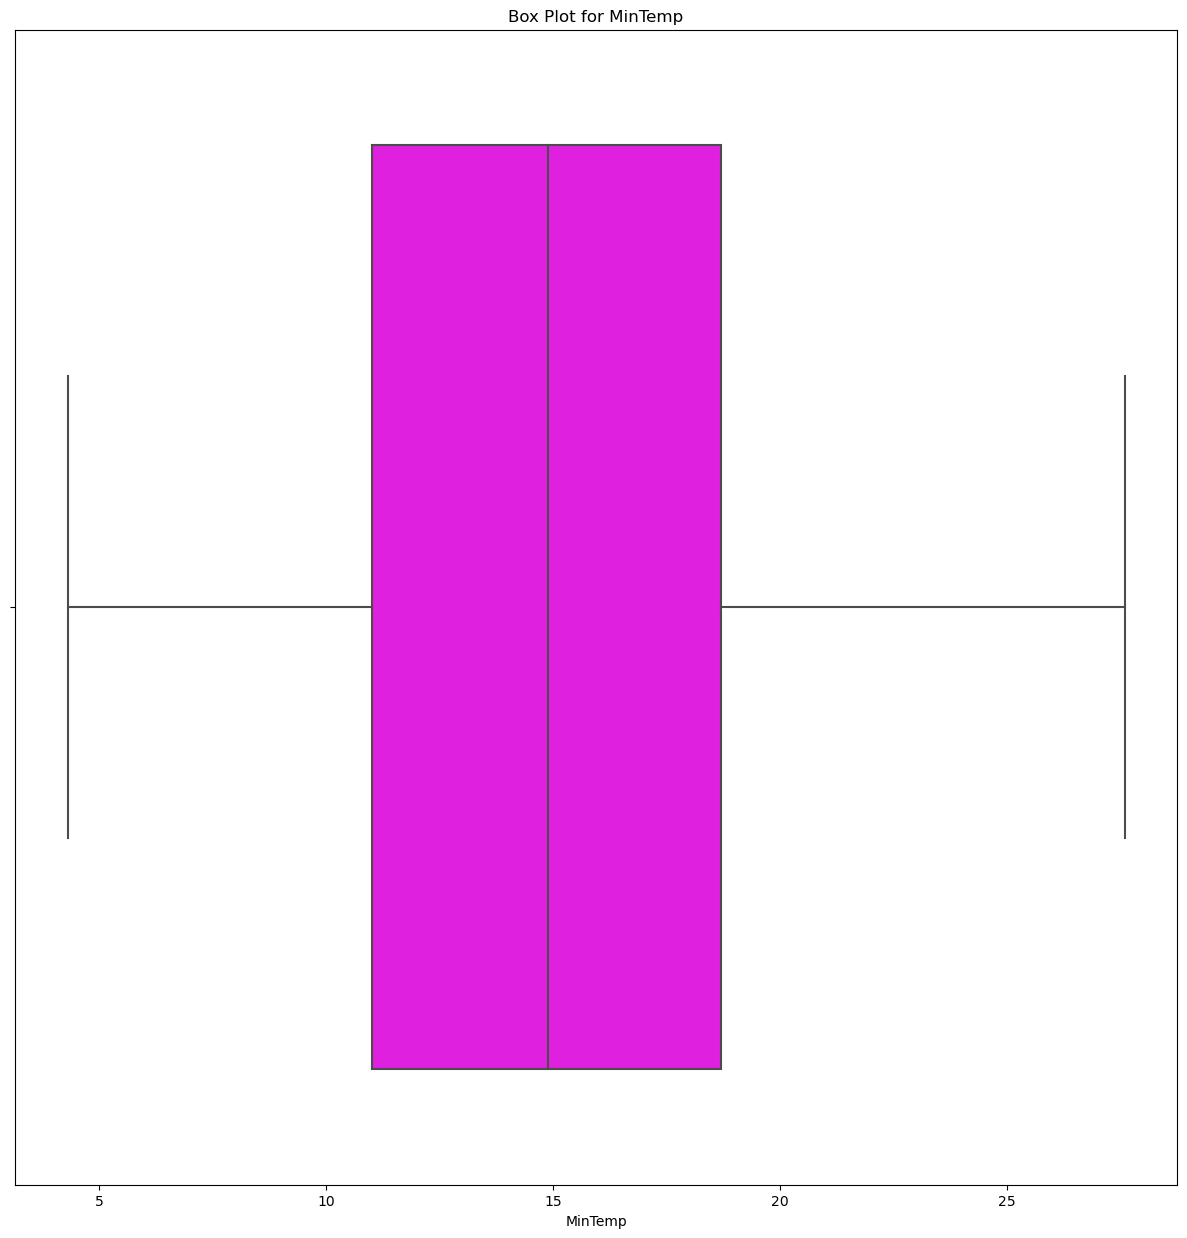

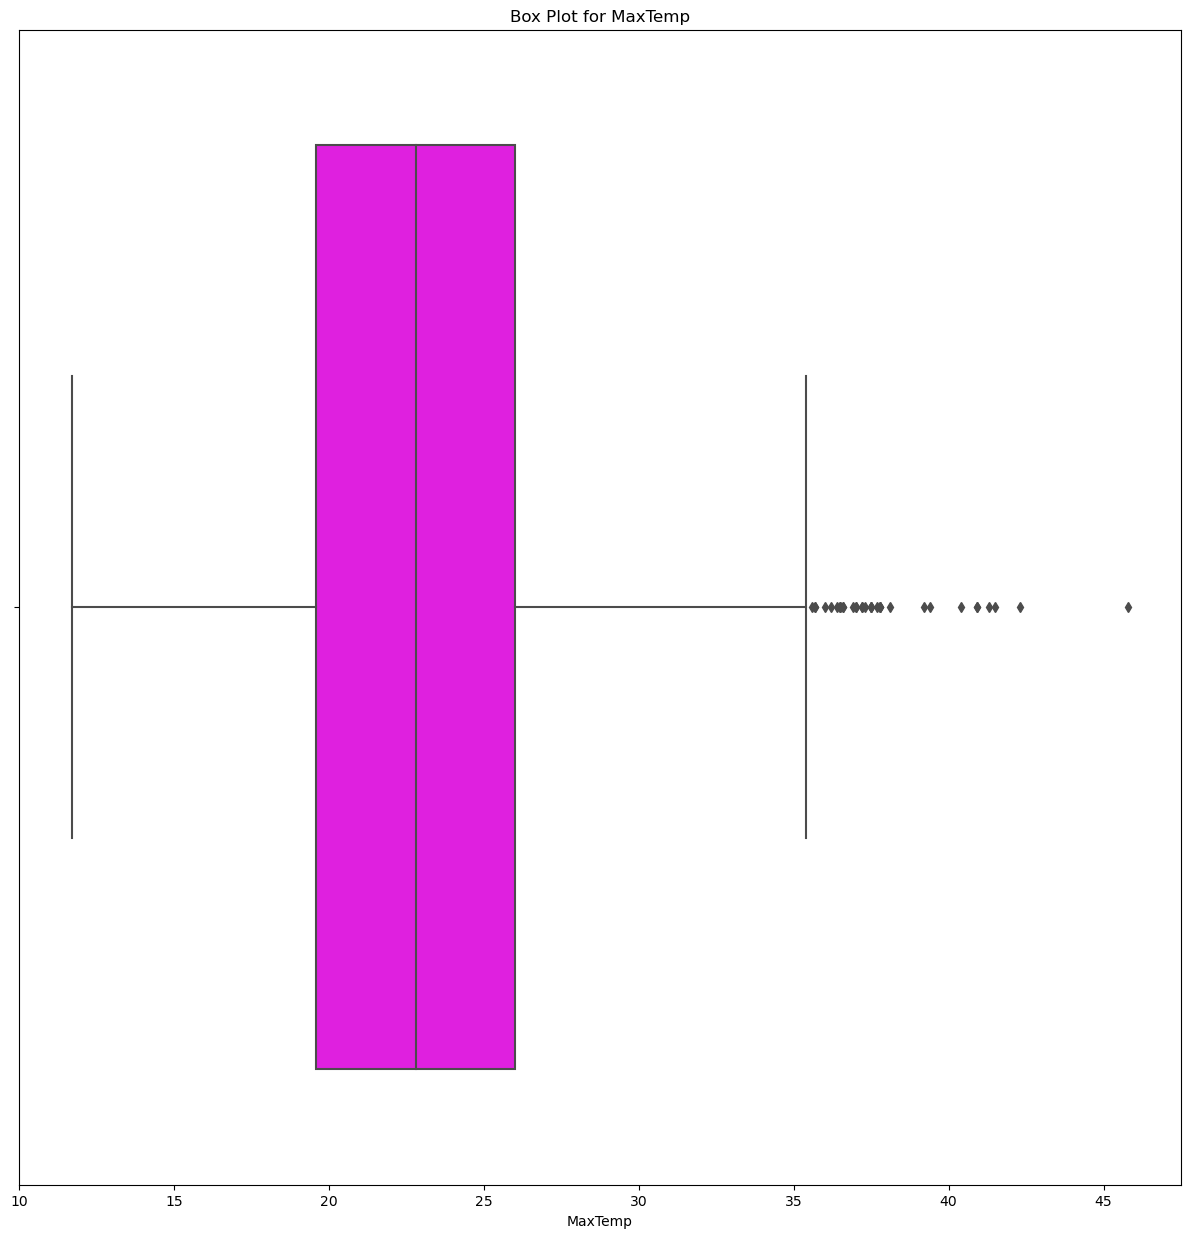

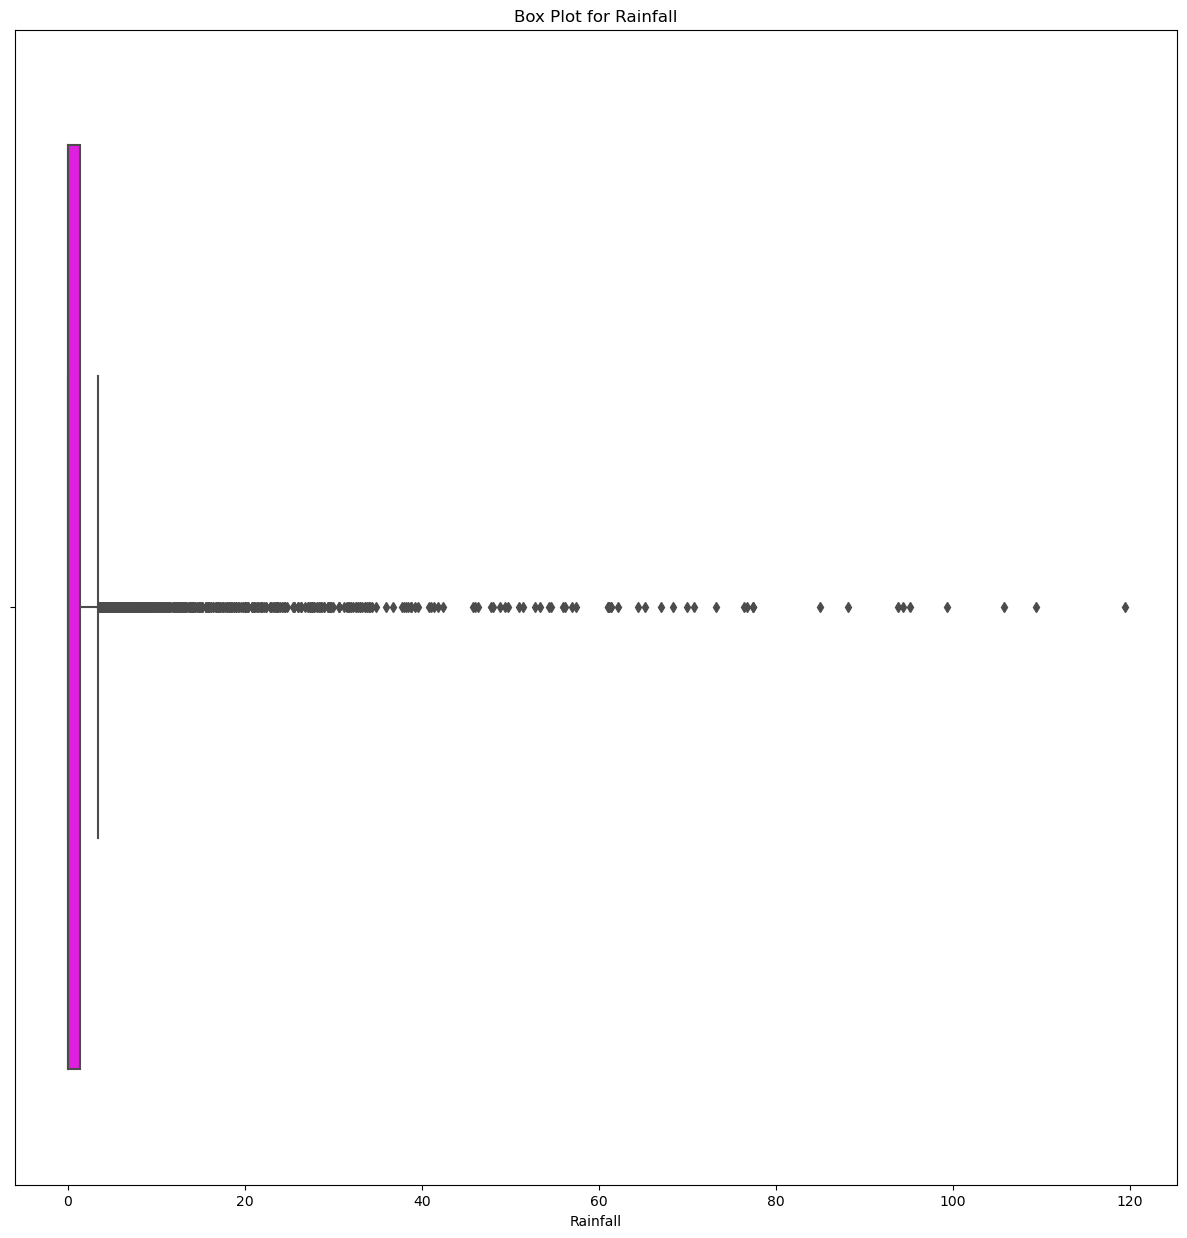

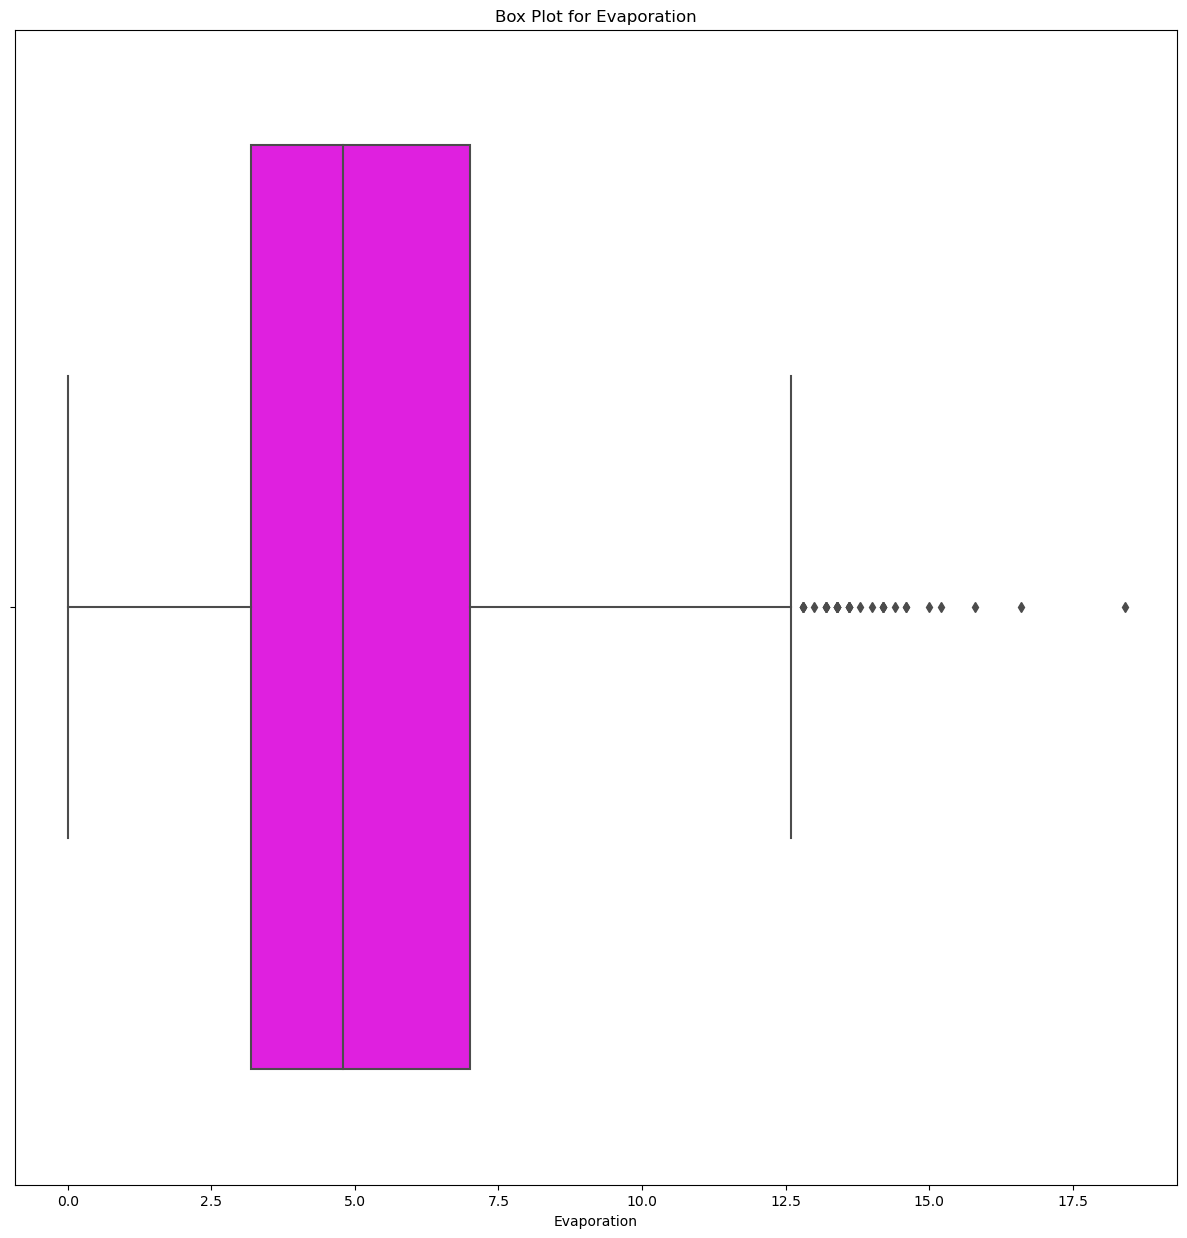

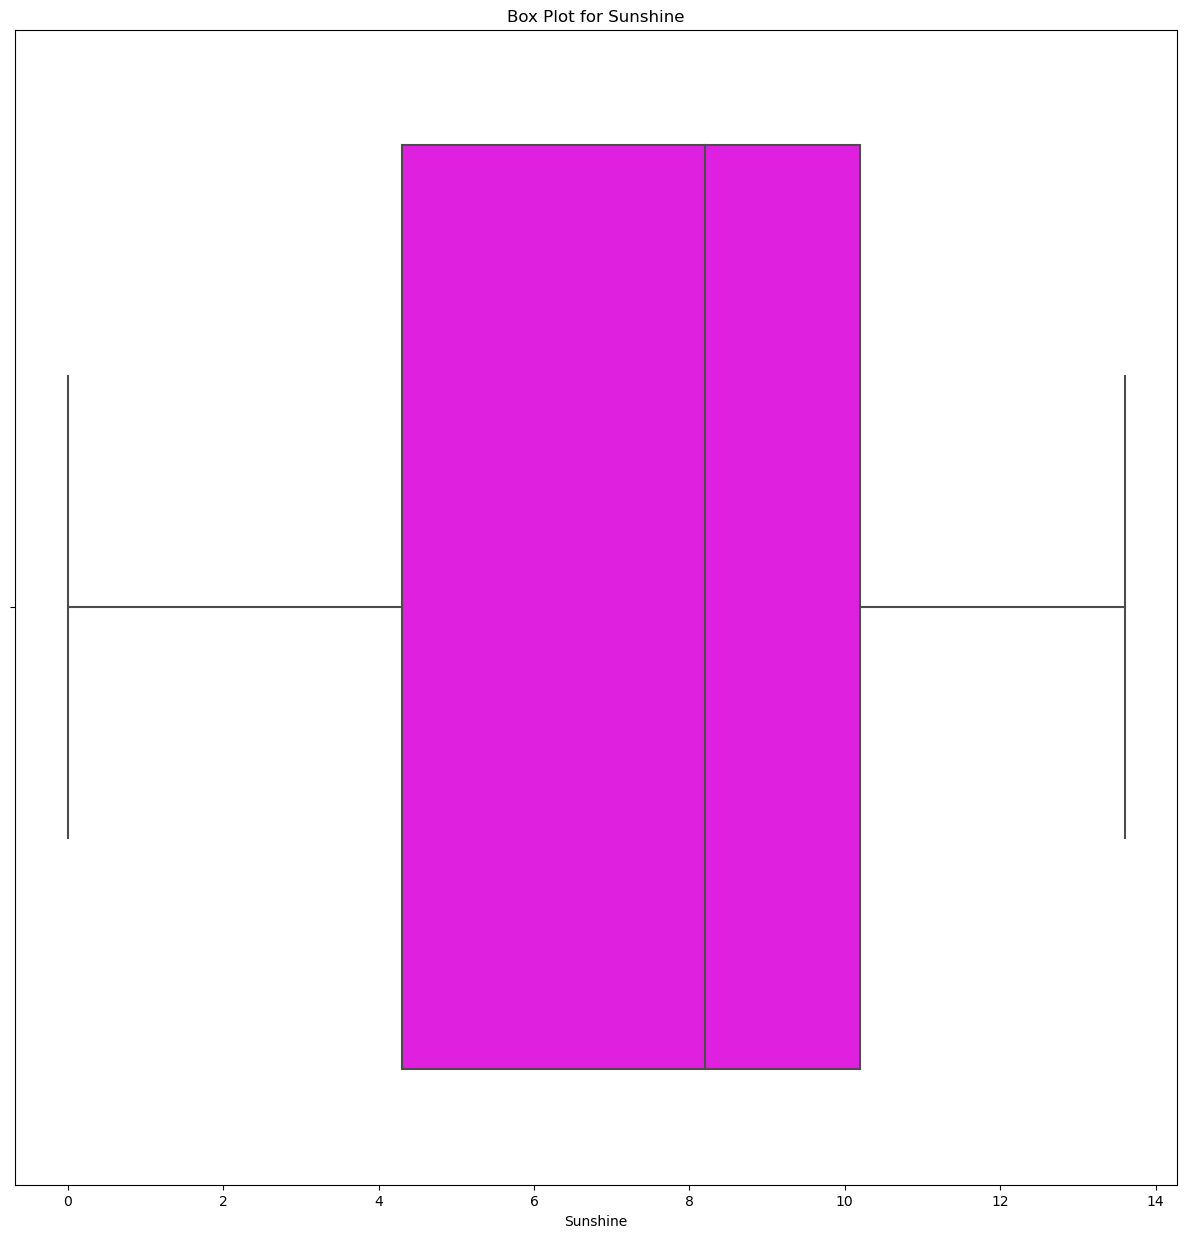

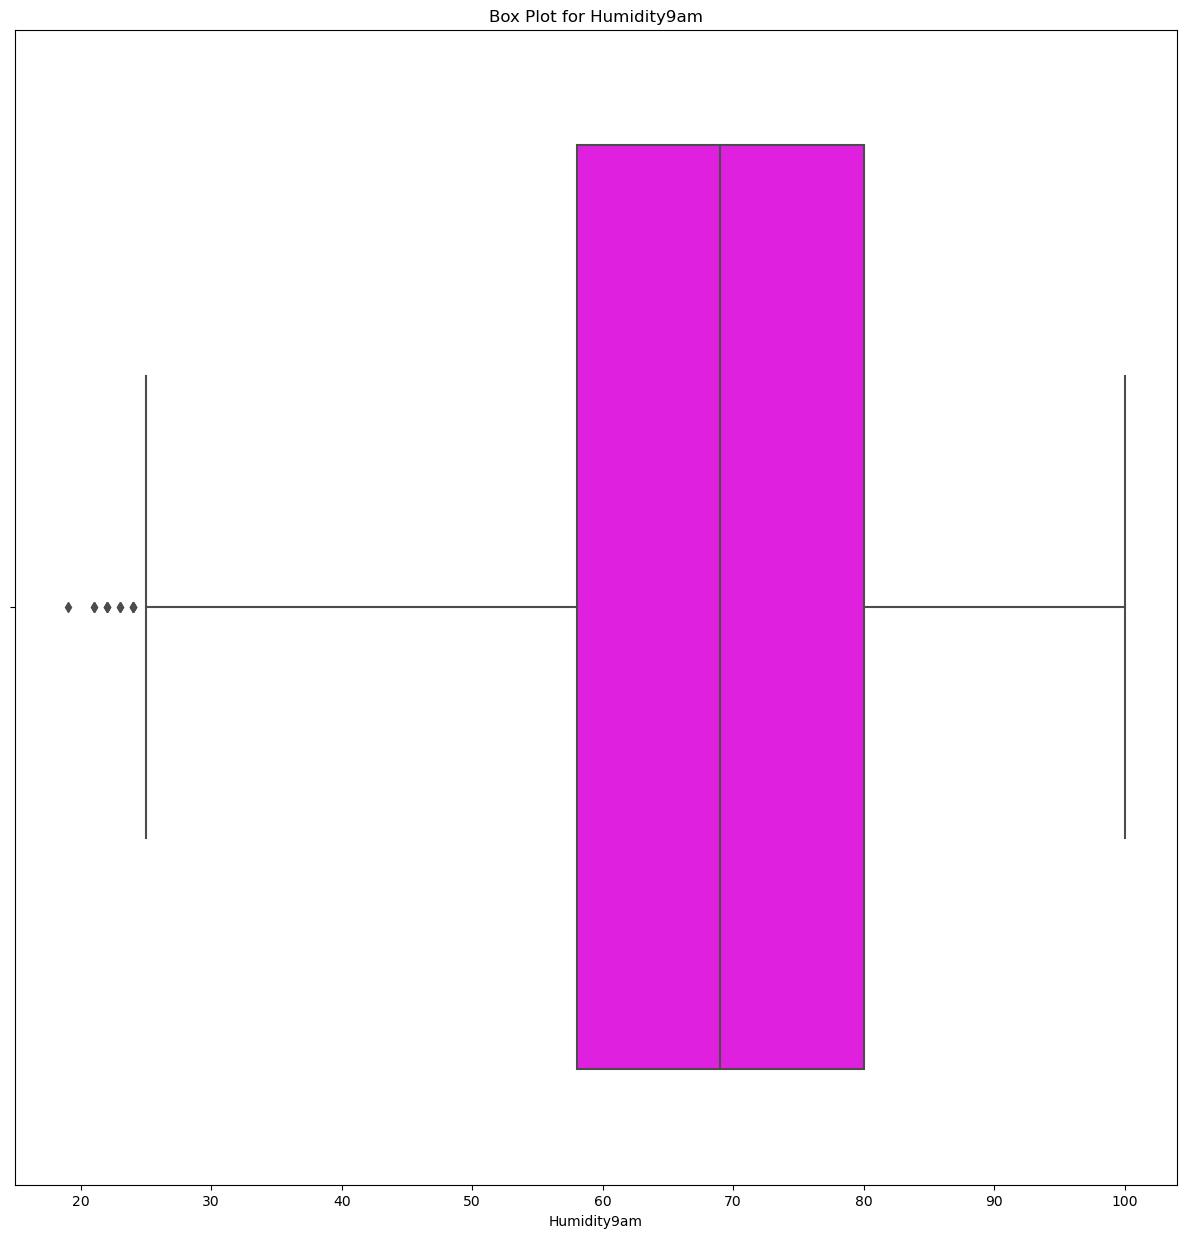

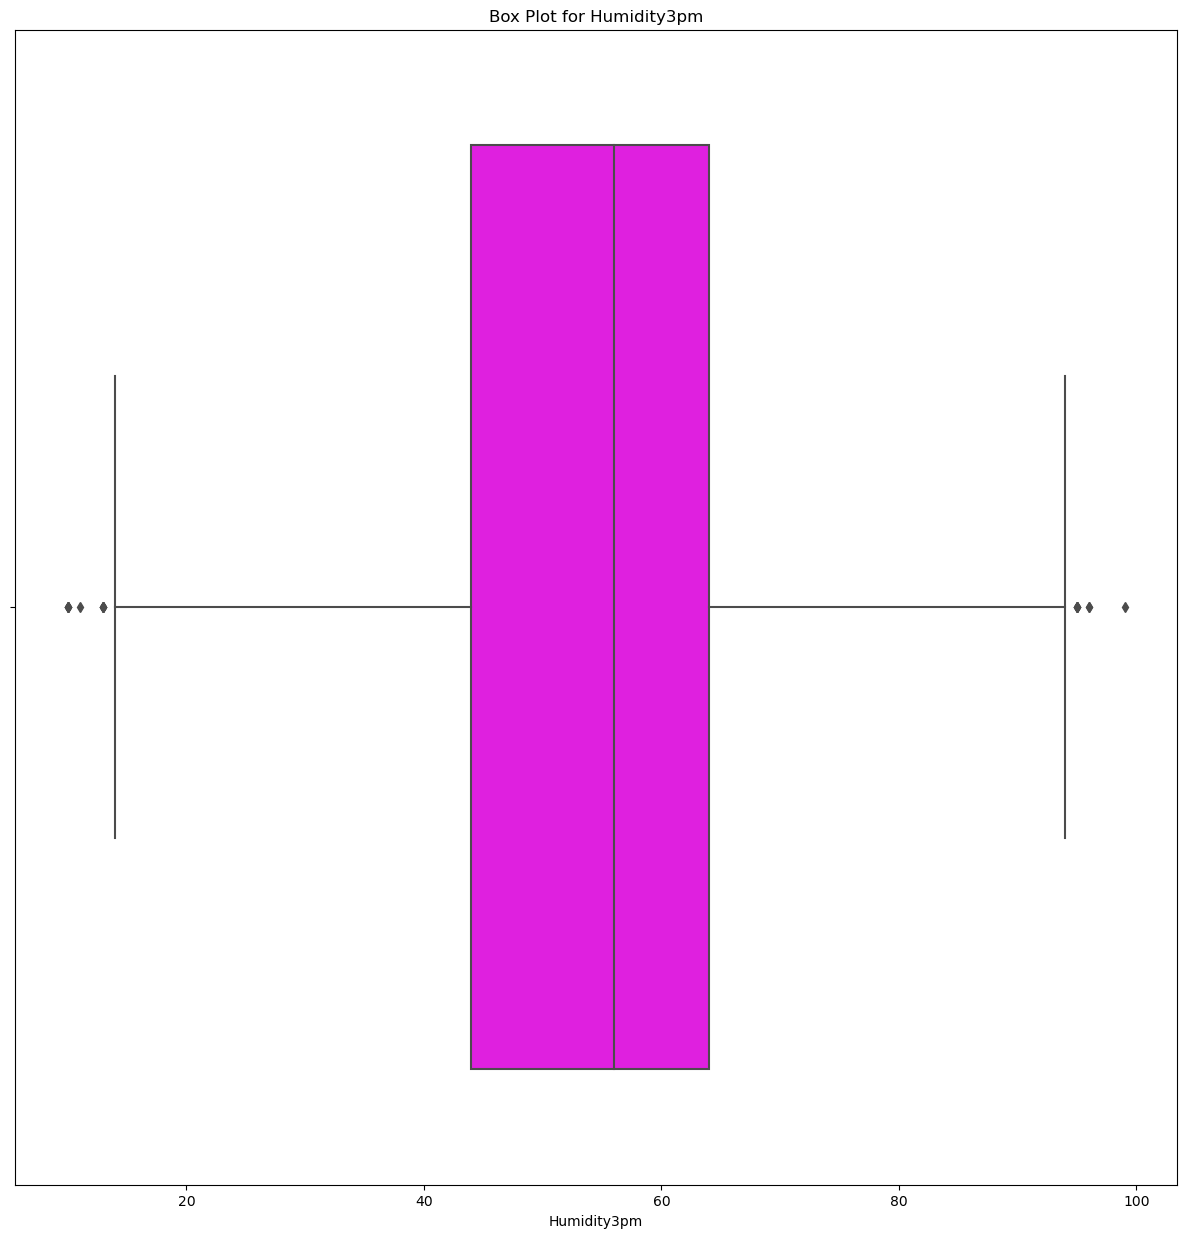

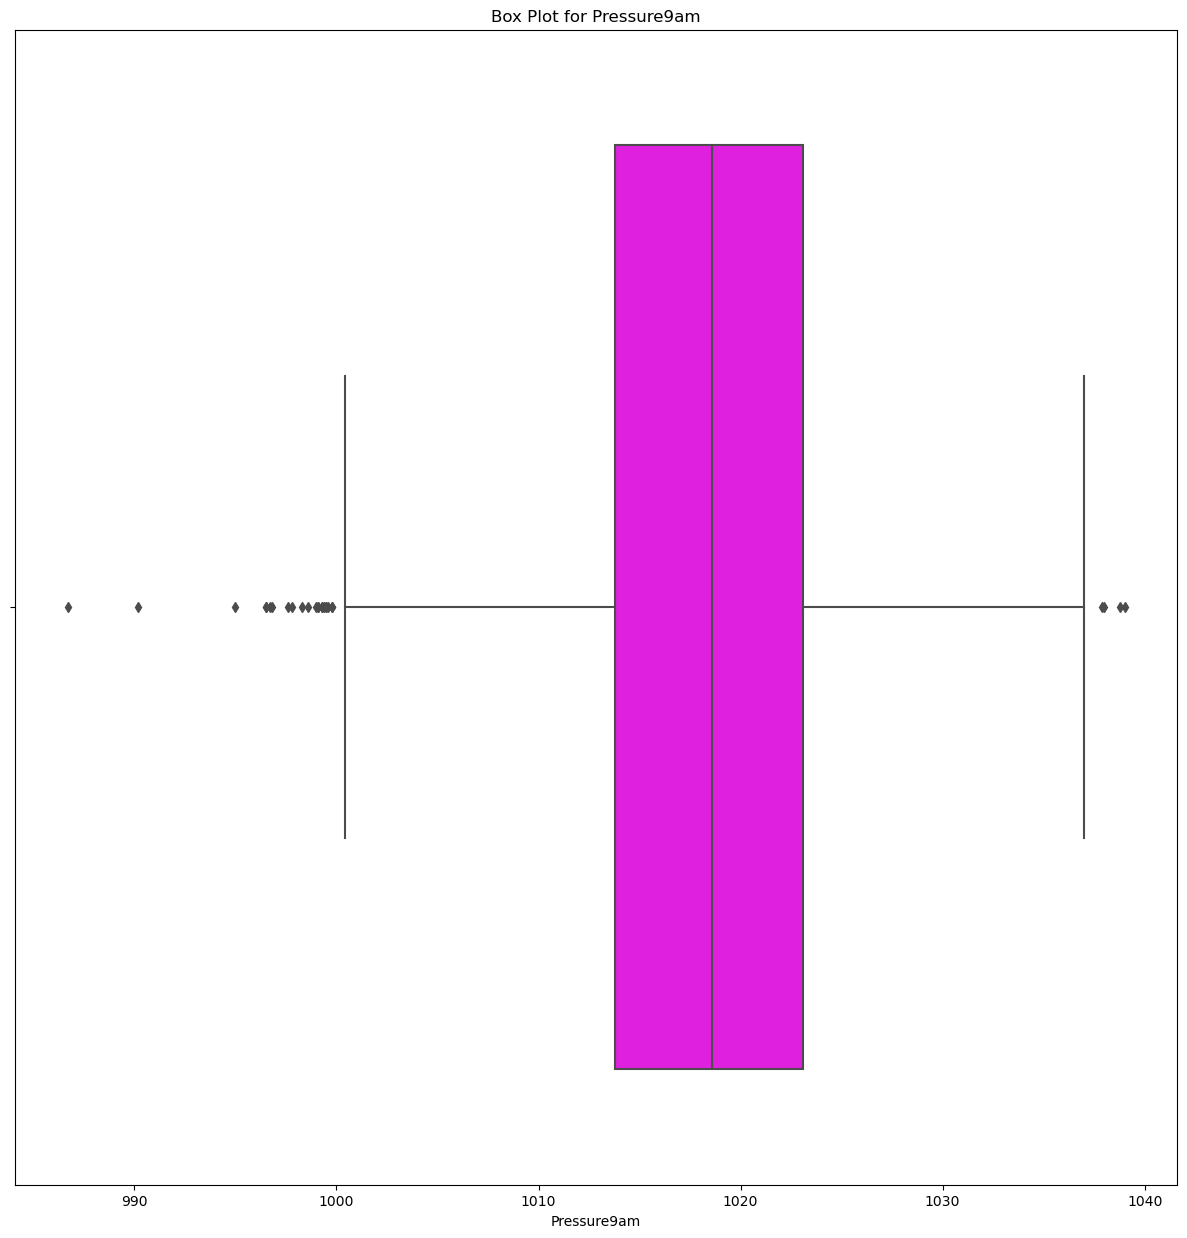

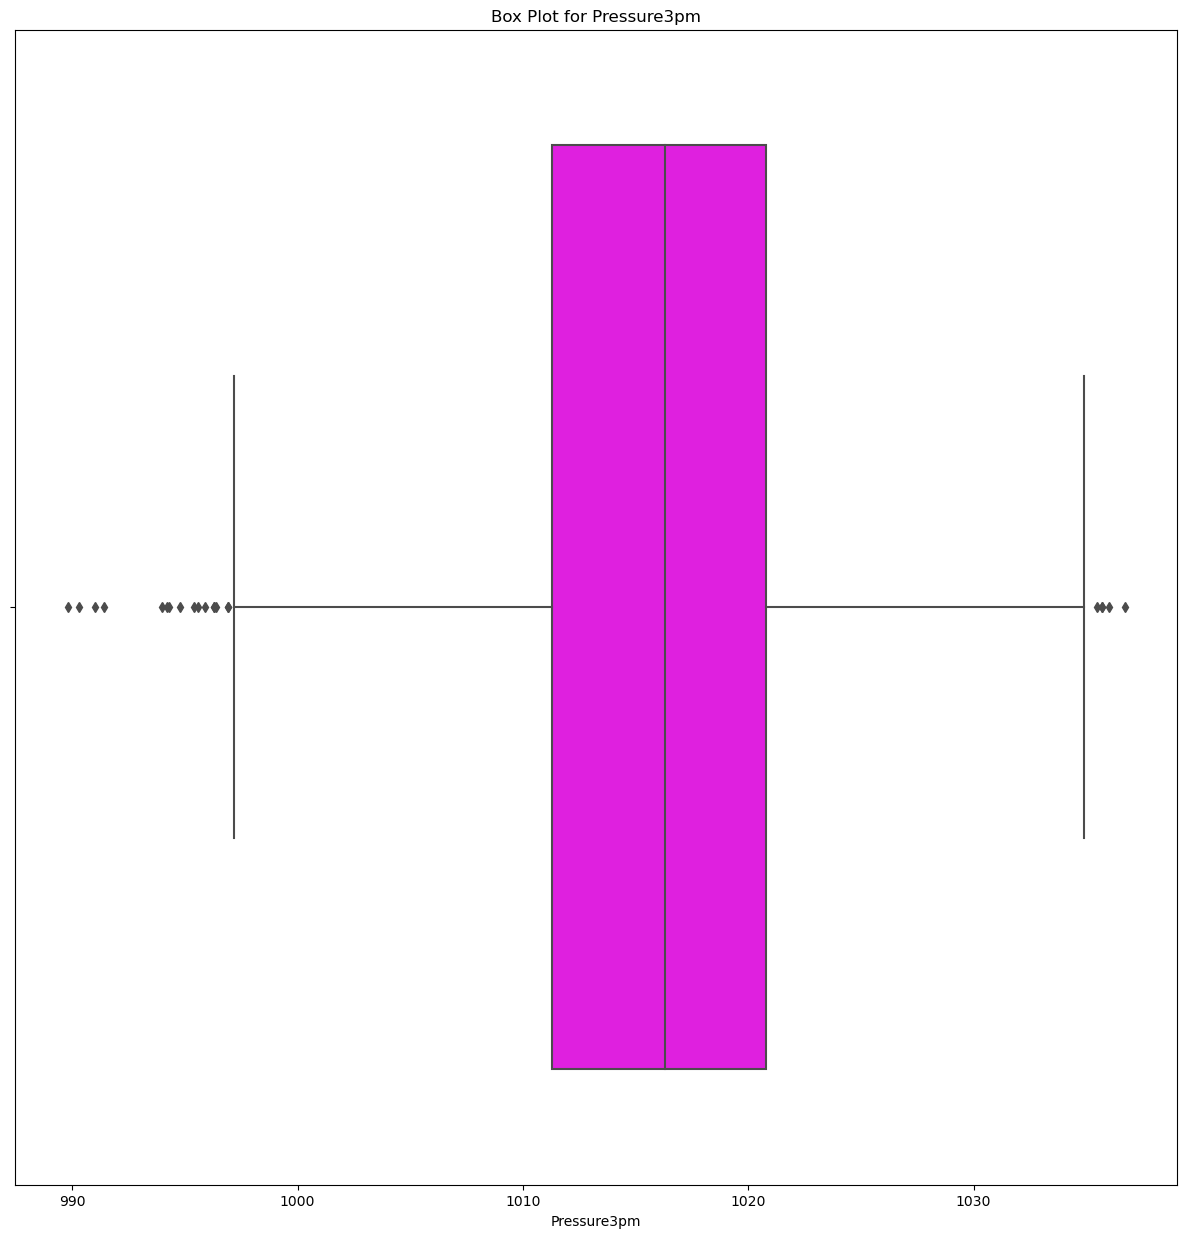

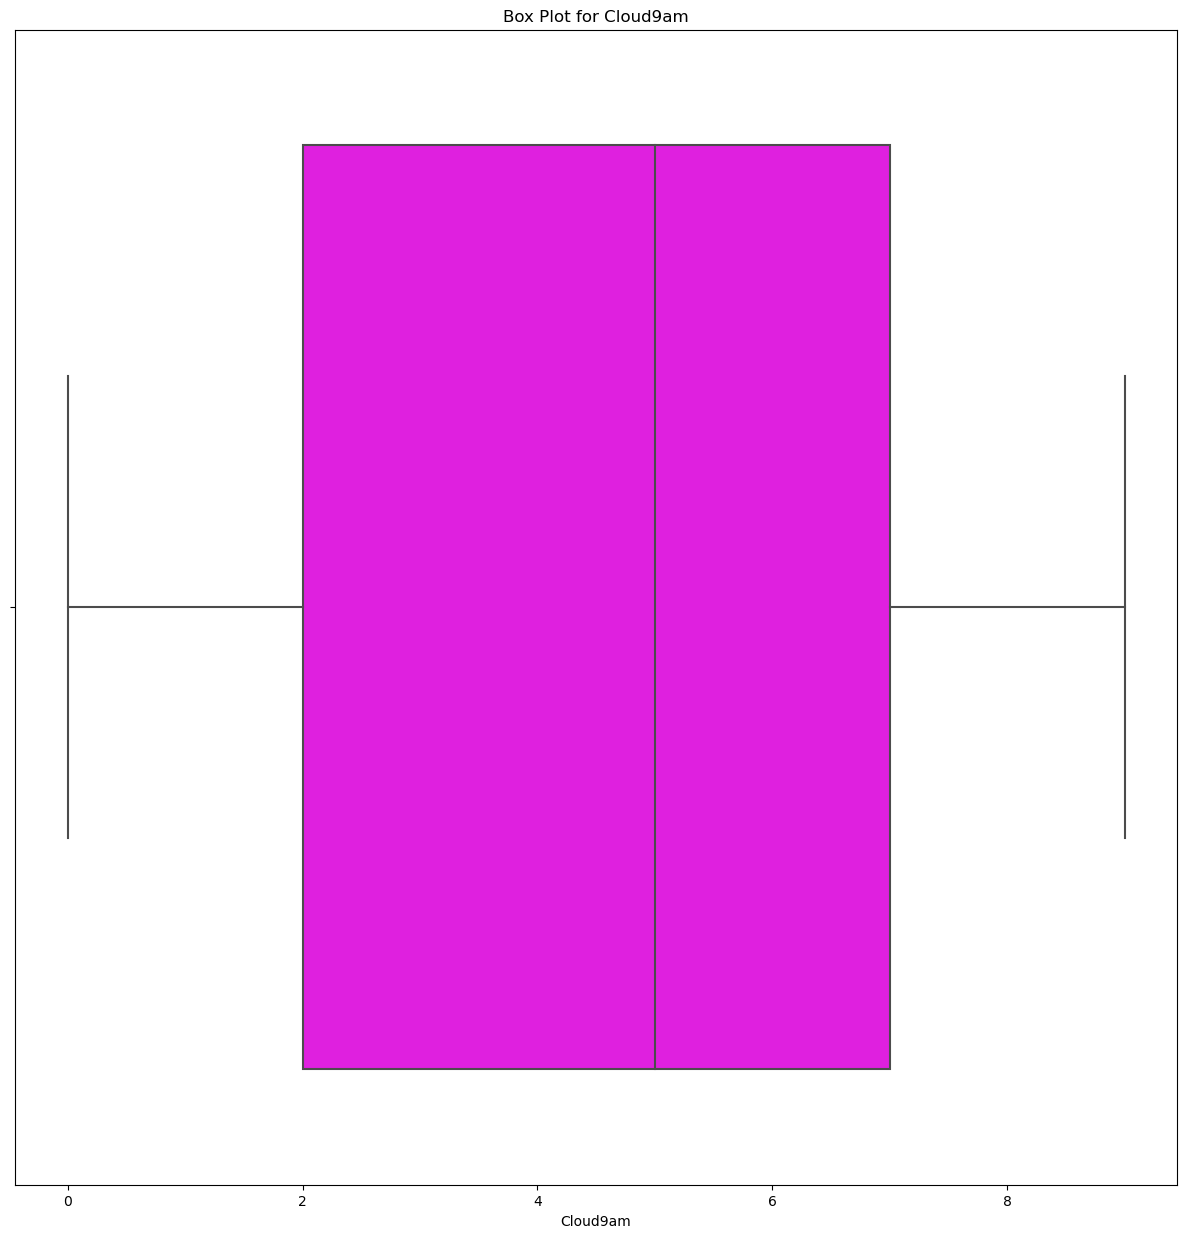

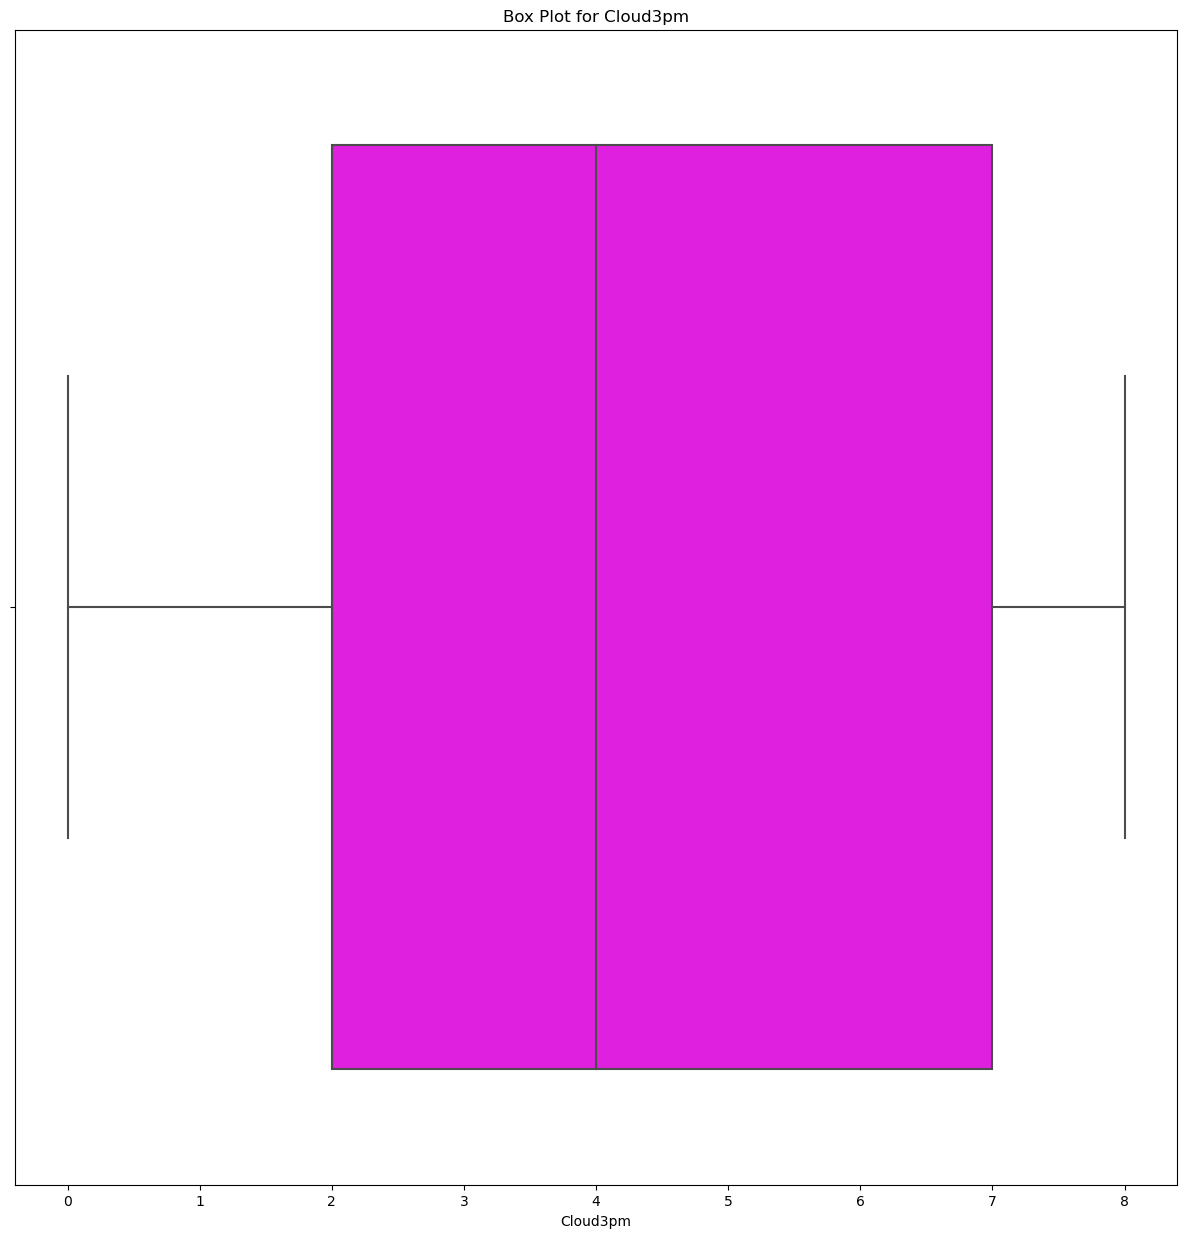

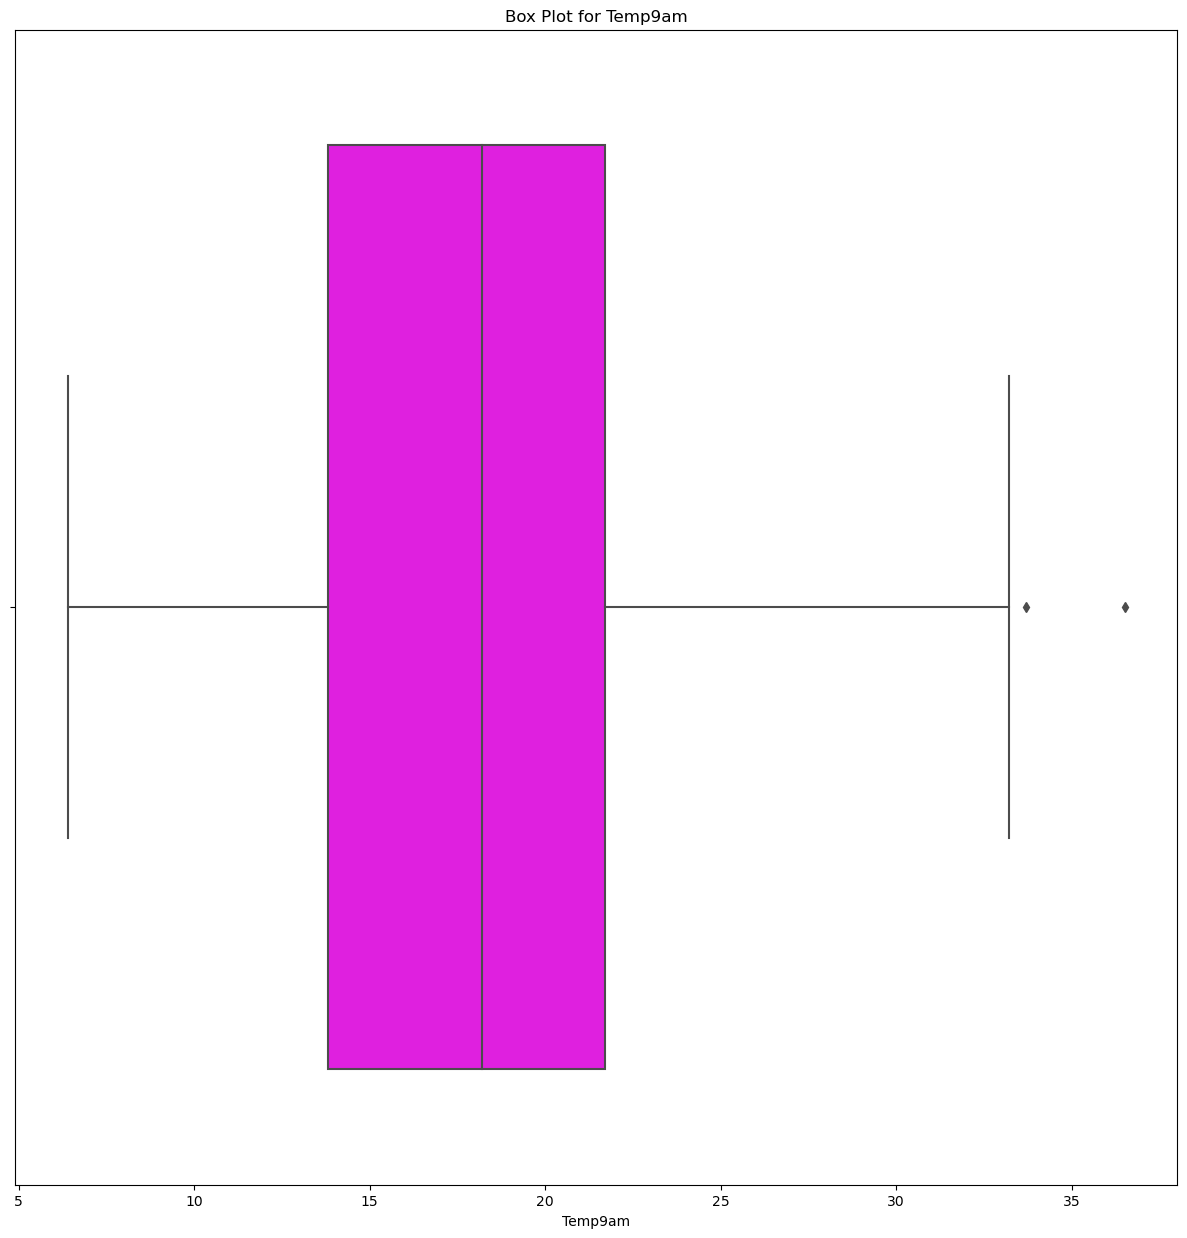

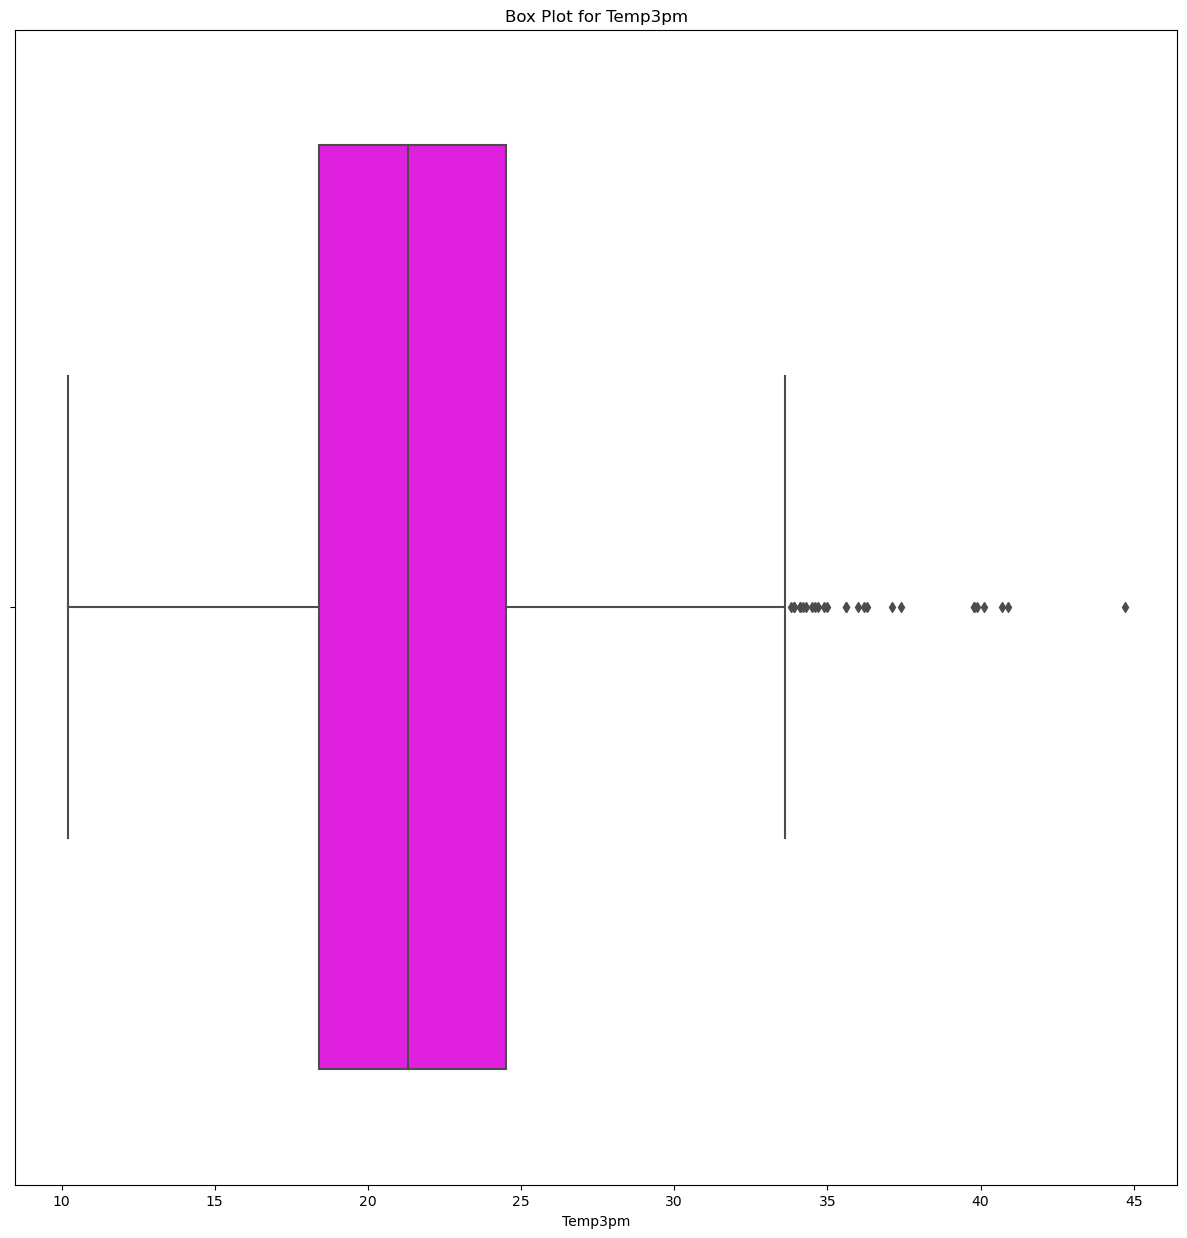

In [20]:
# Loop through each numerical column and create box plots to identify any outliers after data treatment.

for feature in num_cols:

    # Set the figure size before creating each box plot.
    plt.figure(figsize=(15, 15))

    # Copy the DataFrame to avoid modifying the original data
    data = df.copy()

    # Create a box plot for the current feature
    # Use magenta color for the box plots.
    sns.boxplot(data=df1, x=feature, color='magenta')
    # Set the title for the box plot
    plt.title(f'Box Plot for {feature}')

   # Display the box plot
    plt.show()


# 3. Data Visualisation

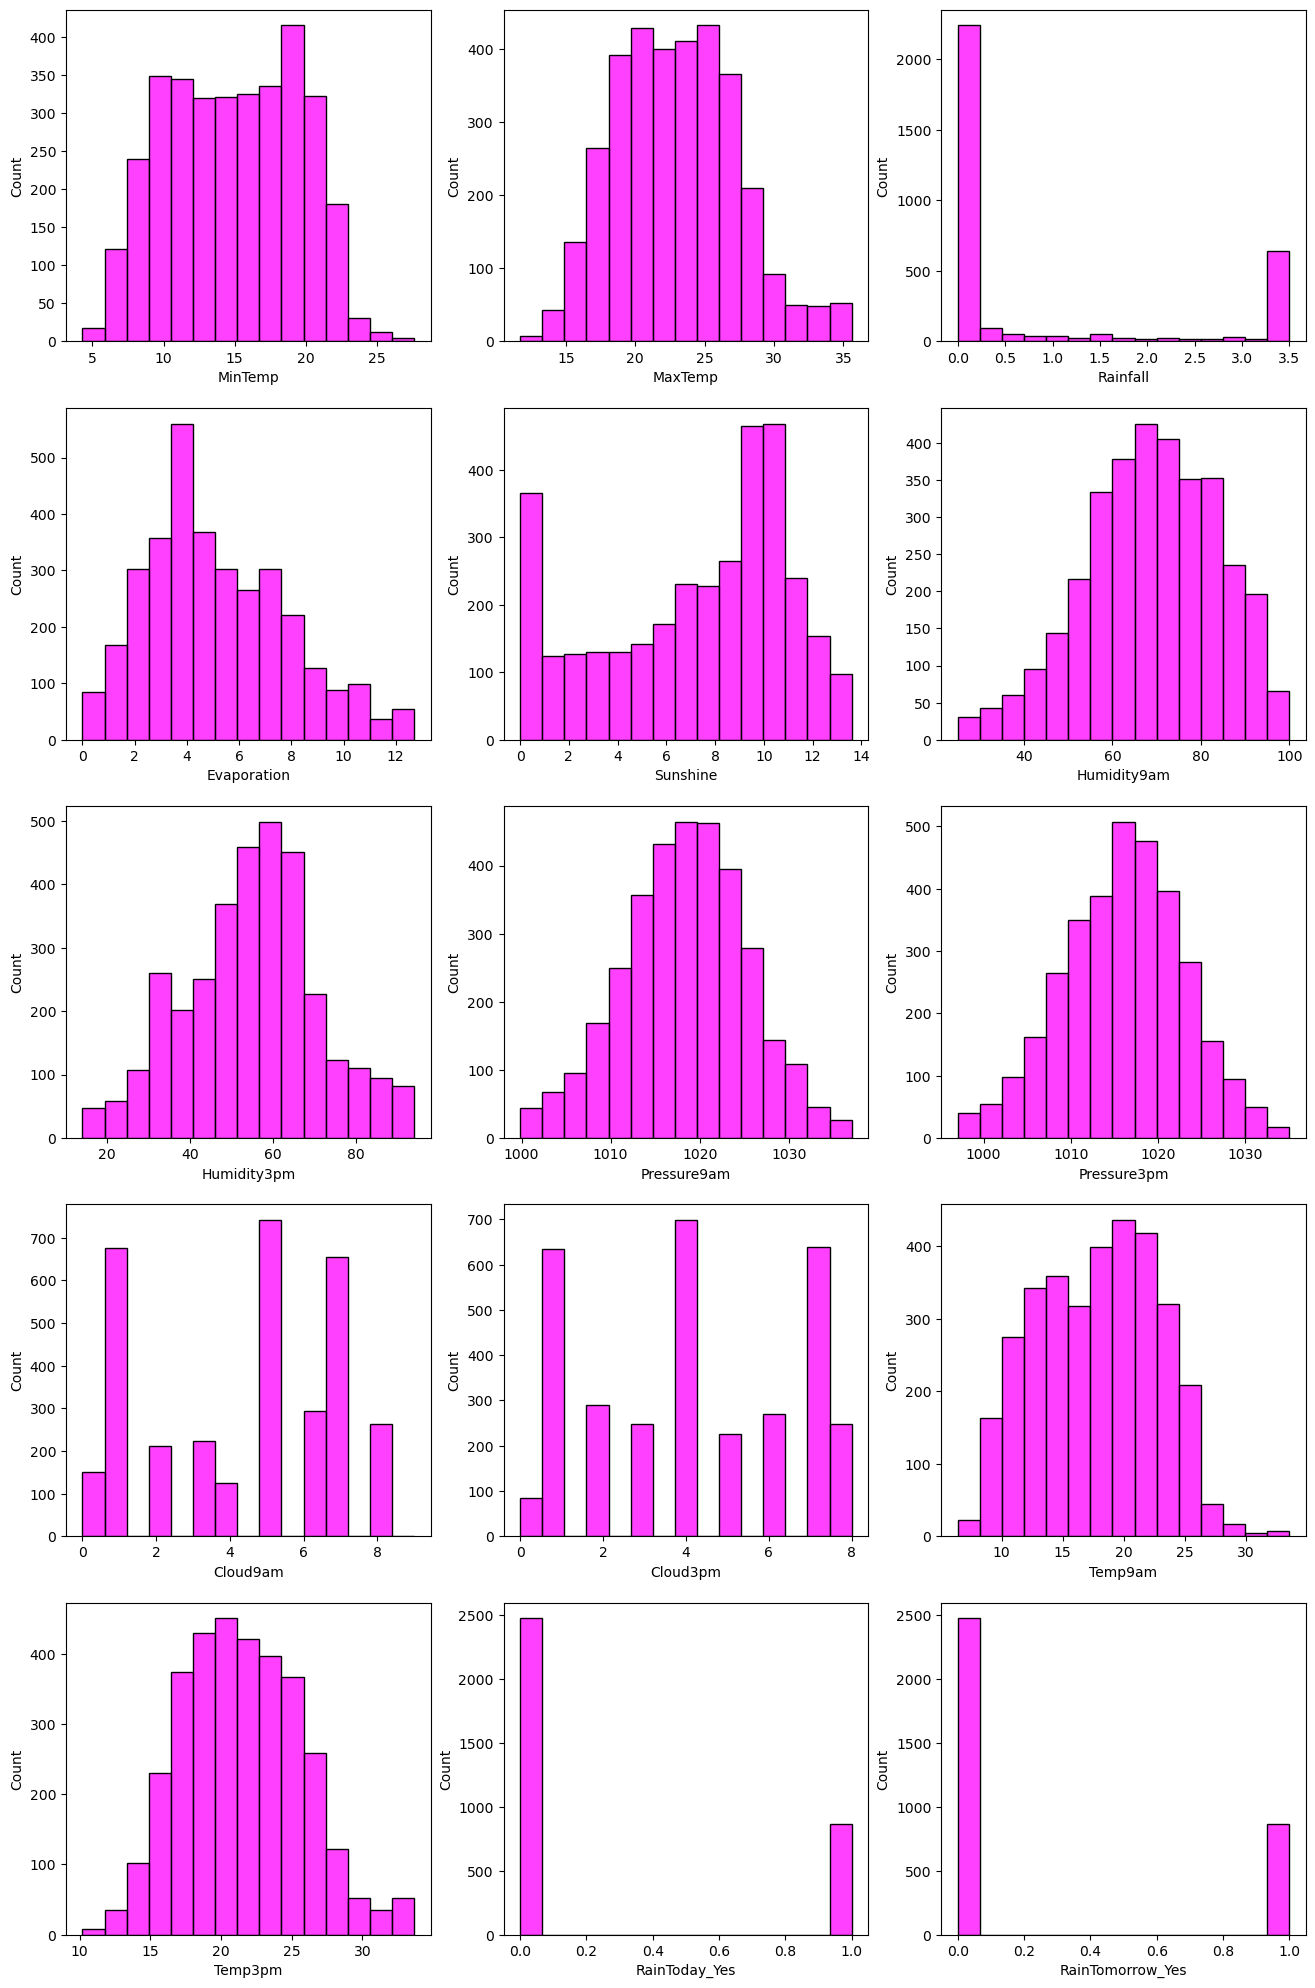

In [21]:
# Set the number of rows and columns for the subplot grid
n_rows = 5
n_cols = 3

# Create the subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

# Set the size of the figure
fig.set_size_inches((16, 25))

# Select the columns from the original DataFrame to plot (columns 1 to 14)
# Consider only columns that are useful for evaluation
selected_columns = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]

# Loop through each column and plot the distribution using seaborn's histplot
for i, column in enumerate(selected_columns.columns):
    sns.histplot(df[column], ax=axes[i // n_cols, i % n_cols], bins=15, color='magenta')


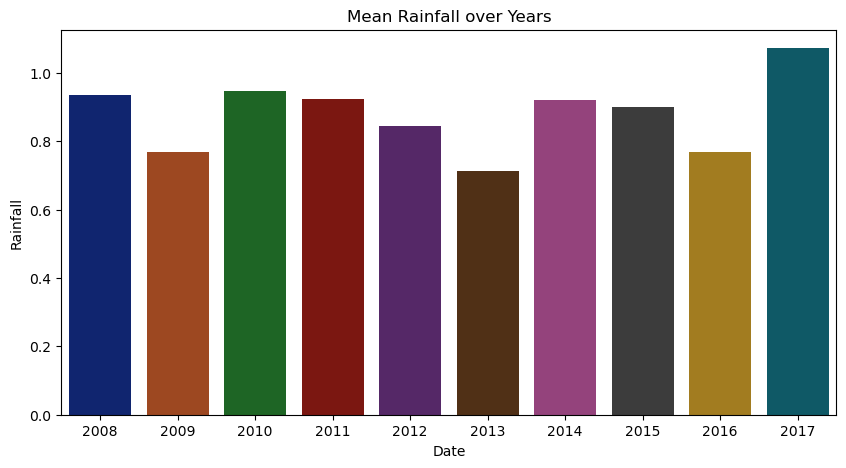

In [22]:
# Convert the 'Date' column to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the DataFrame by year and calculate the mean rainfall for each year
mean_rainfall_by_year = df.groupby(df['Date'].dt.year)['Rainfall'].mean()

# Create a figure and set its size
plt.figure(figsize=(10, 5))

# Create a bar plot using Seaborn
# x = mean_rainfall_by_year.index: The years from the index of the mean_rainfall_by_year Series (which is the years)
# y = mean_rainfall_by_year: The mean rainfall values for each year
# palette = sns.color_palette("Paired"): The color palette for the bars
sns.barplot(x=mean_rainfall_by_year.index, y=mean_rainfall_by_year, palette="dark")

# Set the title of the plot
plt.title("Mean Rainfall over Years")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Mean MinTemp over Years')

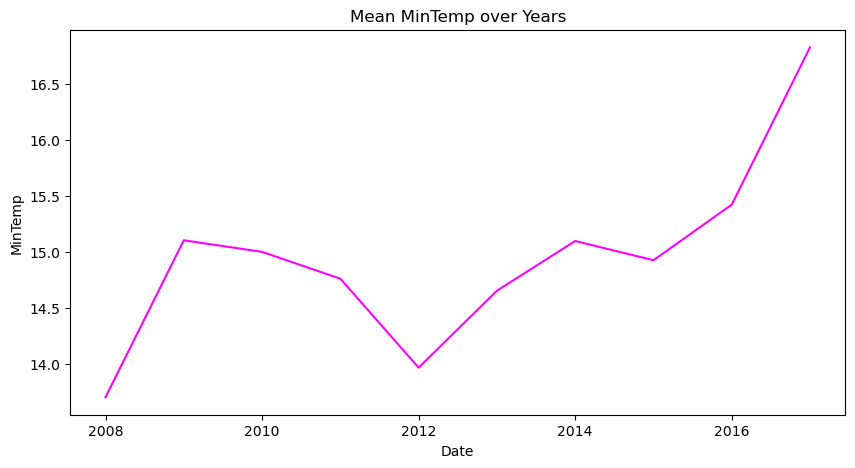

In [23]:
# Convert the 'Date' column to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the DataFrame by year and calculate the mean minimum temperature for each year
MinTemp_year = df.groupby(df['Date'].dt.year)['MinTemp'].mean()

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches((10, 5))

# Create a line plot using Seaborn
# x = MinTemp_year.index: Years
# y = MinTemp_year: Mean minimum temperature values for each year
# palette = sns.color_palette("Paired"): Color palette for the line
sns.lineplot(x=MinTemp_year.index, y=MinTemp_year, color='magenta').set_title("Mean MinTemp over Years")

Text(0.5, 1.0, 'Mean Evaporation over Years')

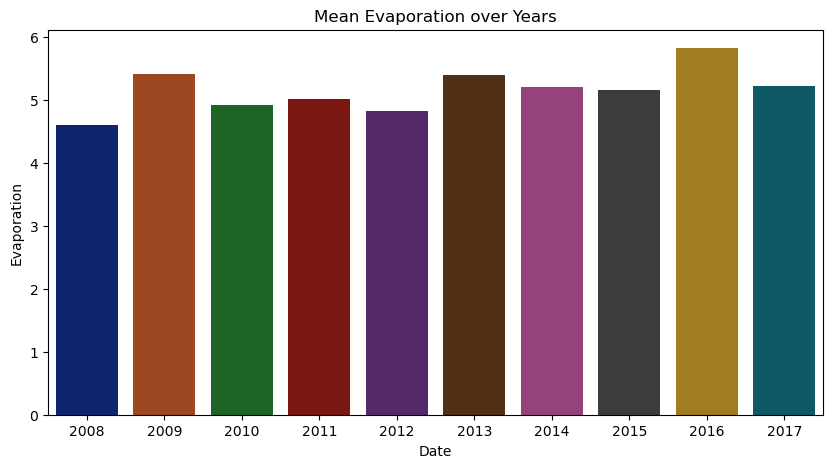

In [24]:
# Convert the 'Date' column to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Group the DataFrame by year and calculate the mean evaporation for each year
Ev_year = df.groupby(df['Date'].dt.year)['Evaporation'].mean()
# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches((10, 5))
# Create a bar plot using Seaborn
# x = Ev_year.index: The years from the index of Ev_year DataFrame (which is the years)
# y = Ev_year: The mean evaporation values for each year
# palette = sns.color_palette("Paired"): The color palette for the bars
sns.barplot(x = Ev_year.index, y = Ev_year,
            palette = sns.color_palette("dark")).\
            set_title("Mean Evaporation over Years")

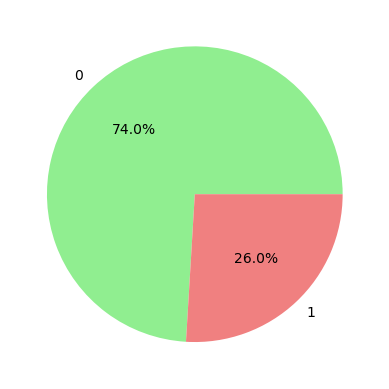

In [25]:
# Create a pie chart using matplotlib
# df['RainToday_Yes'].value_counts().values: Counts of unique values in the 'RainToday_Yes' column
# df['RainToday_Yes'].value_counts().index: Unique values in the 'RainToday_Yes' column
# autopct='%1.1f%%': Format for displaying the percentage on each slice
plt.pie(df['RainToday_Yes'].value_counts().values,
        labels = df['RainToday_Yes'].value_counts().index,
        autopct='%1.1f%%',
        colors=['lightgreen', 'Lightcoral'])
plt.show()

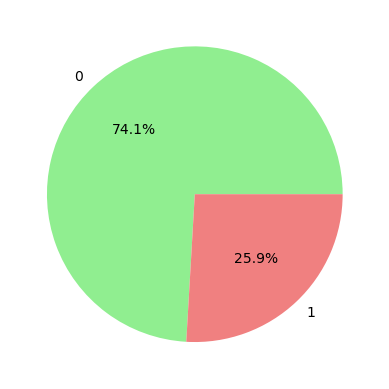

In [26]:
# Create a pie chart using matplotlib with purple color
plt.pie(df['RainTomorrow_Yes'].value_counts().values,
        labels=df['RainTomorrow_Yes'].value_counts().index,
        autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral'])  # Set the colors to purple and a contrasting color (e.g., lightcoral)
plt.show()


### Observation:
- The pie chart presented provides a visual representation of a class imbalance within the 'RainTomorrow_Yes' column. It is evident that there exists a substantial disparity in the counts between the 'NO' and 'YES' classes. To rectify this class imbalance and potentially improve model accuracy, resampling techniques should be considered.

### Resample the data to avoid class imbalance

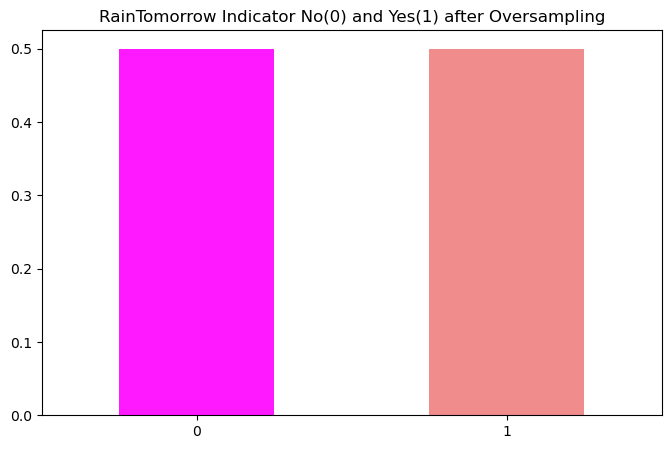

In [27]:
# Import necessary libraries
from sklearn.utils import resample

# Define custom colors for the plot
colors = ['magenta', 'lightcoral']

# Separate data into 'No' and 'Yes' classes for 'RainTomorrow_Yes'
no = df[df.RainTomorrow_Yes == 0]
yes = df[df.RainTomorrow_Yes == 1]

# Perform oversampling of the 'Yes' class to balance the class distribution
# replace=True allows sampling with replacement, n_samples=len(no) matches the size of the 'No' class
# random_state=123 sets a fixed random seed for reproducibility
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)

# Combine the oversampled 'Yes' class with the 'No' class
df = pd.concat([no, yes_oversampled])

# Create a bar plot to visualize the distribution of 'RainTomorrow_Yes' classes after oversampling
fig = plt.figure(figsize=(8, 5))
df.RainTomorrow_Yes.value_counts(normalize=True).plot(kind='bar', color=colors, alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling')
plt.show()

# 4. Feature Selection
### Splitting X-y variables

In [28]:
# Create the feature matrix X by excluding the target variable 'RainTomorrow_Yes'
# and the 'Date' column, which is not used as a feature
X = df.drop(['RainTomorrow_Yes', 'Date'], axis=1)
# Create the target variable Y by selecting the 'RainTomorrow_Yes' column
y = df[['RainTomorrow_Yes']]

In [29]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
9,14.6,24.2,3.4999,4.4,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,1
10,16.4,23.9,0.0000,6.4,8.0,78.0,53.0,1017.6,1015.3,7.0,8.0,18.9,23.7,0
13,16.9,24.3,3.0000,3.2,8.7,81.0,51.0,1017.2,1016.5,7.0,1.0,18.4,23.3,1
14,18.3,24.4,0.0000,6.2,8.5,80.0,56.0,1020.2,1018.9,7.0,3.0,19.5,23.8,0
15,16.7,24.1,0.0000,6.2,8.8,77.0,52.0,1023.0,1022.6,7.0,6.0,19.8,23.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,10.0,16.7,3.4999,2.4,0.2,93.0,90.0,1016.3,1014.8,8.0,6.0,10.6,13.8,1
122,14.3,17.6,3.4999,1.8,0.1,97.0,90.0,1027.3,1024.8,8.0,7.0,15.3,17.1,1
2983,12.9,17.2,3.4999,6.4,1.6,85.0,86.0,1015.4,1016.5,7.0,7.0,14.9,14.6,1
2996,16.5,16.9,3.4999,2.4,0.0,91.0,90.0,1019.7,1018.4,8.0,8.0,16.7,16.2,1


In [30]:
y

,RainTomorrow_Yes
9,0
10,0
13,0
14,0
15,0
...,...
1879,1
122,1
2983,1
2996,1


### Feature Scalling

In [31]:
# Standardize the feature matrix X using StandardScaler
# Create an instance of the StandardScaler
sc = StandardScaler()

# Use the fit_transform method to standardize the feature matrix X
X = sc.fit_transform(X)

In [32]:
X

array([[-0.1035885 ,  0.34707476,  1.54083384, ..., -0.12549809,
         0.506429  ,  1.39512176],
       [ 0.29914488,  0.28039411, -0.74918406, ...,  0.2290877 ,
         0.59891515, -0.71678332],
       [ 0.41101527,  0.36930164,  1.21374451, ...,  0.12479776,
         0.506429  ,  1.39512176],
       ...,
       [-0.4839478 , -1.2088071 ,  1.54083384, ..., -0.60523182,
        -1.5051447 ,  1.39512176],
       [ 0.32151896, -1.27548775,  1.54083384, ..., -0.22978803,
        -1.13520011,  1.39512176],
       [ 1.12698573,  0.54711671,  1.54083384, ...,  0.7505374 ,
         0.7607659 ,  1.39512176]])

# 5. Model Training
- Splitting Dataset into 80:20 (Training set and Testing set).

In [33]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets with a 80:20 ratio
# The test_size parameter is set to 0.2, indicating a 20% test set size.
# The random_state parameter ensures reproducibility by fixing the random seed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Shape of y_test:", y_test.shape)
print("Shape of X_train:", X_train.shape)

Shape of y_test: (989, 1)
Shape of X_train: (3955, 14)


## 5.1. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model with random_state=0 for reproducibility
cl_lr = LogisticRegression(random_state=0)

# Fit the logistic regression model to the training data
cl_lr.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [35]:
# Use the predict method of the logistic regression model to make predictions on the test data X_test
y_pred_lr = cl_lr.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

# Calculate the accuracy score by comparing the true labels y_test with the predicted labels y_pred_lr
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_score_lr = precision_score(y_test, y_pred_lr)
recall_score_lr = recall_score(y_test, y_pred_lr)

# Print the evaluation metrics
print("Accuracy score for logistic regression:", accuracy_lr)
print("Precision score for logistic regression:", precision_score_lr)
print("Recall score for logistic regression:", recall_score_lr)

Accuracy score for logistic regression: 0.7745197168857432
Precision score for logistic regression: 0.7796257796257796
Recall score for logistic regression: 0.7621951219512195


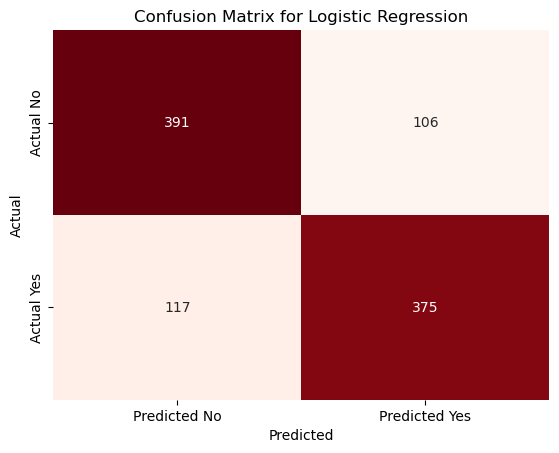

In [37]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cl_lr = confusion_matrix(y_test, y_pred_lr)

# Create a heatmap for the confusion matrix
sns.heatmap(cl_lr, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Receiver_operating_characteristics_score: 0.7744577219414045


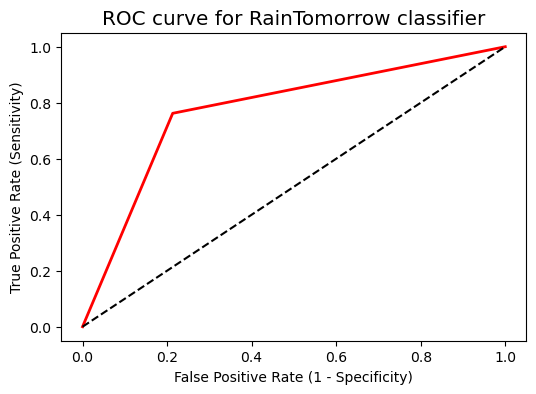

In [38]:
# plot ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve
# Print ROC score
roc_auc = roc_auc_score(y_test, y_pred_lr)
print("Receiver_operating_characteristics_score:",roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, color='Red')
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## 5.2. Linear Discriminant Analysis(LDA)

In [39]:
# Import the LinearDiscriminantAnalysis class from scikit-learn.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create an instance of the Linear Discriminant Analysis (LDA) classifier
clf_lda = LinearDiscriminantAnalysis()
# Fit the LDA classifier to the training data
clf_lda.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [40]:
# Make predictions on new data (X_test)
y_pred_lda = clf_lda.predict(X_test)

In [41]:
# Model Evaluation 
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate the accuracy score by comparing the true labels Y_test with the predicted labels y_pred_lda
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)

print("Accuracy score for LDA:", accuracy_lda)
print("Precision score for LDA:", precision_lda)
print("Recall score for LDA:", recall_lda)


Accuracy score for LDA: 0.775530839231547
Precision score for LDA: 0.7848101265822784
Recall score for LDA: 0.7560975609756098


<Axes: >

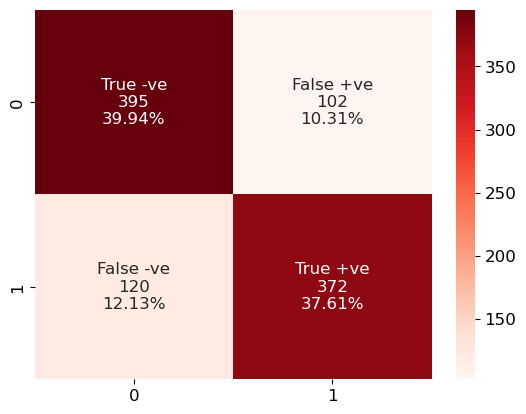

In [42]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
clf_lda = confusion_matrix(y_test, y_pred_lda)
group_names = ['True -ve','False +ve','False -ve','True +ve']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_lda.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_lda.flatten()/np.sum(clf_lda)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_lda, annot=labels, fmt="", cmap='Reds')

Receiver_operating_characteristics_score: 0.7754330863228149


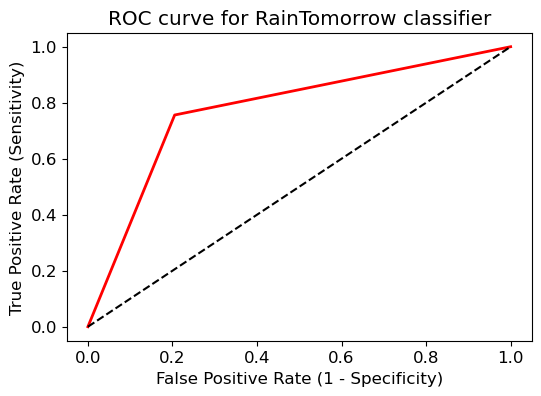

In [43]:
# plot ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve

#Print ROC score
roc_auc_lda = roc_auc_score(y_test, y_pred_lda)
print("Receiver_operating_characteristics_score:",roc_auc_lda)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, color='Red')
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## 5.3. K-Nearest Neighbors(KNN)

In [44]:
from sklearn import preprocessing
# Create an instance of the StandardScaler and fit it to the training data X_train
scaler = preprocessing.StandardScaler().fit(X_train)
# Use the transform method of the scaler to standardize the training data X_train
X_train_s = scaler.transform(X_train)

In [45]:
# Create an instance of the StandardScaler and fit it to the test data X_test using the parameters learned from X_train
scaler = preprocessing.StandardScaler().fit(X_test)
# Use the transform method of the scaler to standardize the test data X_test
X_test_s = scaler.transform(X_test)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
# Create an instance of the K-Nearest Neighbors (KNN) classifier with n_neighbors=1
clf_knn_1 = KNeighborsClassifier(n_neighbors = 1)
# Fit the KNN classifier to the training data
clf_knn_1.fit(X_train_s,y_train)
# Make predictions on new data (X_test)
y_pred_knn = clf_knn_1.predict(X_test_s)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [47]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Print performance metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)  # Use a different variable name
recall_knn = recall_score(y_test, y_pred_knn)  # Use a different variable name
print("Accuracy score for KNN:", accuracy_knn)
print("Precision score for KNN:", precision_knn)
print("Recall score for KNN:", recall_knn)

Accuracy score for KNN: 0.8968655207280081
Precision score for KNN: 0.8584558823529411
Recall score for KNN: 0.9491869918699187


<Axes: >

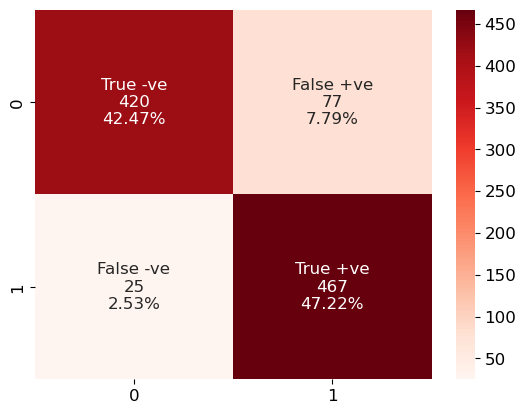

In [48]:
# Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_knn = confusion_matrix(y_test, y_pred_knn)  # Use a different variable name

group_names = ['True -ve', 'False +ve', 'False -ve', 'True +ve']
group_counts = ["{0:0.0f}".format(value) for value in confusion_knn.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in confusion_knn.flatten() / np.sum(confusion_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(confusion_knn, annot=labels, fmt="", cmap='Reds')


Receiver_operating_characteristics_score: 0.897128707202565


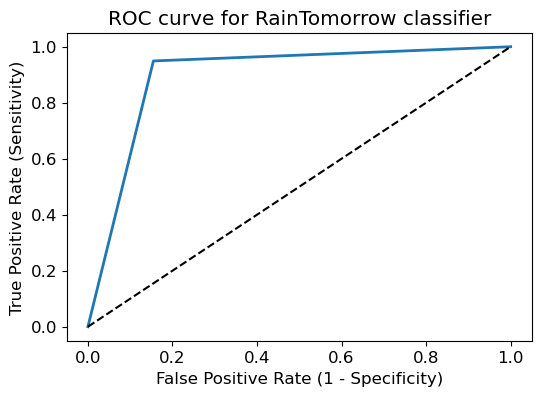

In [49]:
# plot ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve


roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
print("Receiver_operating_characteristics_score:",roc_auc_knn)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# 5.4. Random Forest Classifier

In [50]:
# Standardize the training data using the StandardScaler
from sklearn import preprocessing

# Create an instance of the StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)# Fit the scaler to the training data X_train to compute mean and standard deviation

# Apply the standardization transformation to the training data, resulting in X_train_s
X_train_s = scaler.transform(X_train)

In [51]:
# Standardize the test data using the StandardScaler

# Create an instance of the StandardScaler
scaler = preprocessing.StandardScaler().fit(X_test)# Fit the scaler to the test data X_test using the parameters learned from X_train

# Apply the standardization transformation to the test data, resulting in X_test_s
X_test_s = scaler.transform(X_test)

In [52]:
from sklearn.ensemble import  RandomForestClassifier
# Create an instance of the RandomForestClassifier with 100 estimators and a random seed for reproducibility
clf_rfs = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the RandomForestClassifier to the standardized training data
clf_rfs.fit(X_train_s, y_train)

C:\Users\prem3\AppData\Local\Temp\ipykernel_29452\2820236164.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rfs.fit(X_train_s, y_train)


RandomForestClassifier(random_state=0)

In [53]:
# Make predictions on new data (X_test) using the RandomForestClassifier (clf_rfs)
y_pred_rfs = clf_rfs.predict(X_test)

In [54]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate and print the accuracy score
accuracy_rfs = accuracy_score(y_test, y_pred_rfs)
print("Accuracy score for Random Forest Classifier:", accuracy_rfs)

# Calculate and print the precision score
precision_rfs = precision_score(y_test, y_pred_rfs)
print("Precision score for Random Forest Classifier:", precision_rfs)

# Calculate and print the recall score
recall_rfs = recall_score(y_test, y_pred_rfs)
print("Recall score for Random Forest Classifier:", recall_rfs)

Accuracy score for Random Forest Classifier: 0.9241658240647118
Precision score for Random Forest Classifier: 0.9001919385796545
Recall score for Random Forest Classifier: 0.9532520325203252


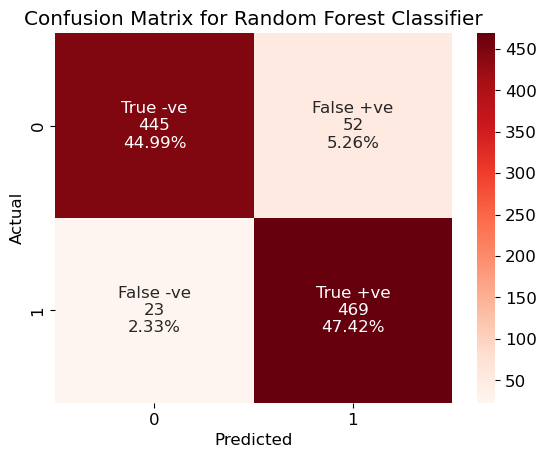

In [55]:
# Create the confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rfs)

# Define labels for different parts of the confusion matrix
group_names = ['True -ve','False +ve','False -ve','True +ve']

# Convert the counts in the confusion matrix to string format
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_rf.flatten()]

# Calculate the percentages of each part of the confusion matrix relative to the total
group_percentages = ['{0:.2%}'.format(value) for value in confusion_matrix_rf.flatten()/np.sum(confusion_matrix_rf)]

# Combine labels, counts, and percentages to create labels for the heatmap
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Reshape labels into a 2x2 matrix to match the confusion matrix dimensions
labels = np.asarray(labels).reshape(2, 2)

# Create a heatmap of the confusion matrix with annotated labels
sns.heatmap(confusion_matrix_rf, annot=labels, fmt="", cmap='Reds')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

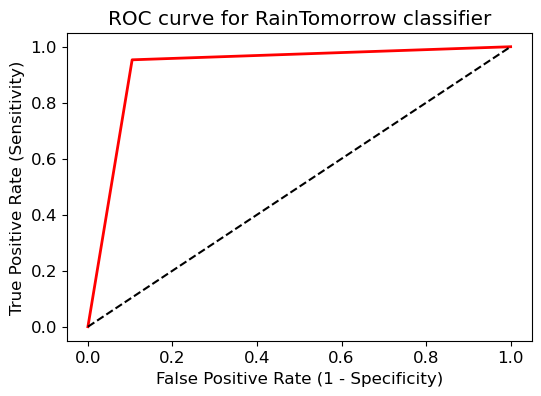

Receiver Operating Characteristics (ROC) Score: 0.9243121329603637


In [56]:
# Import necessary libraries
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y_test, y_pred):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate=False)

    # Calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Create a figure for the ROC curve
    plt.figure(figsize=(6, 4))

    # Plot the ROC curve with a purple color
    plt.plot(fpr, tpr, linewidth=2, color='Red')

    # Plot a diagonal line for reference
    plt.plot([0, 1], [0, 1], 'k--')

    # Set the font size for labels
    plt.rcParams['font.size'] = 12

    # Set labels and title
    plt.title('ROC curve for RainTomorrow classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')

    # Show the ROC curve plot
    plt.show()
    
    # Return the ROC AUC score
    return roc_auc

# Plot the ROC curve with a purple color and get the ROC AUC score
roc_auc_rfs = plot_roc_curve(y_test, y_pred_rfs)
print("Receiver Operating Characteristics (ROC) Score:", roc_auc_rfs)

## 5.5. Grid Search (Hyperparameter Tuning)

In [57]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning
# Create a Random Forest classifier
rf = RandomForestClassifier()  # Initialize a Random Forest classifier object

In [58]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the Random Forest
    'max_depth': [None, 10, 20],              # Maximum depth of individual decision trees
    'min_samples_split': [2, 5, 10]          # Minimum samples required to split an internal node
}

In [59]:
# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
# 'estimator' is set to the Random Forest classifier 'rf'
# 'param_grid' is set to the dictionary of hyperparameters to search

# Fit the grid search to the training data (X_train and Y_train)
grid_search.fit(X_train, y_train)
# 'X_train' is the training data features
# 'Y_train' is the corresponding training data labels
# 'cv=5' specifies 5-fold cross-validation during the grid search
#  Note: Please be aware that the execution of the following code may take approximately 3-4 minutes

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [60]:
# Get the best model
best_rf_model = grid_search.best_estimator_
# 'grid_search.best_estimator_' returns the estimator (model) with the best hyperparameters
# This model has the hyperparameters that resulted in the best performance during grid search

In [61]:
# Make predictions on new data (X_test)
y_pred_best_rf = grid_search.predict(X_test)
# 'grid_search.predict(X_test)' uses the best Random Forest model to predict the target values of X_test
# The predicted values are stored in the 'y_pred_best_rf' variable

In [62]:
# Use the best model to make predictions and evaluate

# Calculate the accuracy of the best model on the test data
accuracy = best_rf_model.score(X_test, y_test)
# 'best_rf_model.score(X_test, Y_test)' computes the accuracy by comparing predicted values to the actual target values in Y_test

# Calculate the precision of the best model on the test data
precision = precision_score(y_test, y_pred_best_rf)
# 'precision_score(Y_test, y_pred_best_rf)' computes the precision of the model's predictions

# Calculate the recall of the best model on the test data
recall = recall_score(y_test, y_pred_best_rf)
# 'recall_score(Y_test, y_pred_best_rf)' computes the recall of the model's predictions

# Print the evaluation metrics
print("Best Model Accuracy:", accuracy)
print("Best Model Precision:", precision)
print("Best Model Recall:", recall)

Best Model Accuracy: 0.9282103134479271
Best Model Precision: 0.9103313840155945
Best Model Recall: 0.9491869918699187


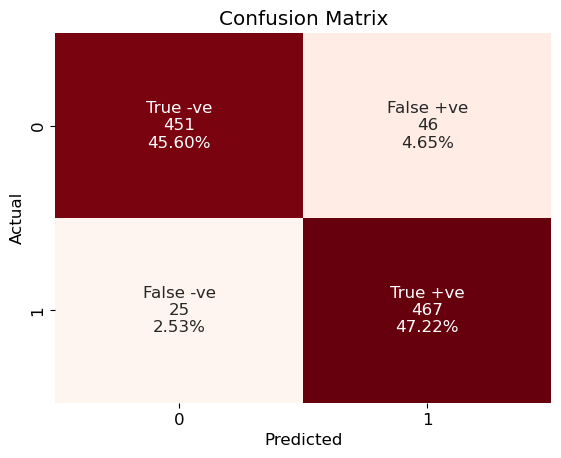

In [63]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred_best_rf)

# Define labels for the confusion matrix
group_names = ['True -ve', 'False +ve', 'False -ve', 'True +ve']
group_counts = [f"{value:0.0f}" for value in confusion.flatten()]
group_percentages = [f'{value:.2%}' for value in confusion.flatten() / np.sum(confusion)]

# Create labels for each cell in the confusion matrix
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(confusion, annot=labels, fmt='', cmap='Reds', cbar=False)

# Add labels and title to the heatmap
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

Receiver Operating Characteristics (ROC) Score: 0.9283158299389835


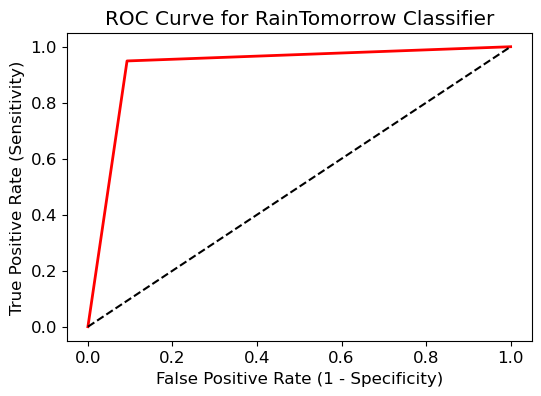

In [64]:
# Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_rf, drop_intermediate=False)

# Calculate ROC AUC score
roc_auc_best_rf = roc_auc_score(y_test, y_pred_best_rf)
print("Receiver Operating Characteristics (ROC) Score:", roc_auc_best_rf)

# Create a plot for the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, color='Red')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance

# Set plot labels and title
plt.title('ROC Curve for RainTomorrow Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

# Show the ROC curve plot
plt.show()

## 5.6. XG Boost Classifier

In [65]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [66]:
# Import the xgboost library
import xgboost as xgb
# Import the accuracy_score metric from sklearn
from sklearn.metrics import accuracy_score

In [67]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create an XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,      # Number of boosting rounds (trees)
    max_depth=3,           # Maximum depth of each tree
    min_child_weight=1,    # Minimum sum of instance weight (Hessian) needed in a child
    gamma=0,               # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.8,         # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    objective='binary:logistic',  # Binary classification
    nthread=-1,            # Number of parallel threads
    seed=42                # Random seed for reproducibility
)

# Training the XGBoost Classifier
xgb_clf.fit(X_train, y_train)

# Making predictions on new data (X_test)
y_pred_xgb = xgb_clf.predict(X_test)

# Calculate accuracy
accuracy_xgb  = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)


Accuracy: 0.9282103134479271


## 5.7. Decision Trees

In [68]:
# Import the DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier  

# Create a Decision Tree Classifier with specified criterion and random state
clf_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)  

# Fit the Decision Tree classifier to the training set
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [69]:
# Use the trained Decision Tree classifier to make predictions on X_test
y_pred_dt = clf_dt.predict(X_test)

In [70]:
# Print the model performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

print("Accuracy score for Decision Tree:", accuracy_dt)
print("Precision score for Decision Tree:", precision_dt)
print("Recall score for Decision Tree:", recall_dt)

Accuracy score for Decision Tree: 0.9039433771486349
Precision score for Decision Tree: 0.8642201834862385
Recall score for Decision Tree: 0.9573170731707317


<Axes: >

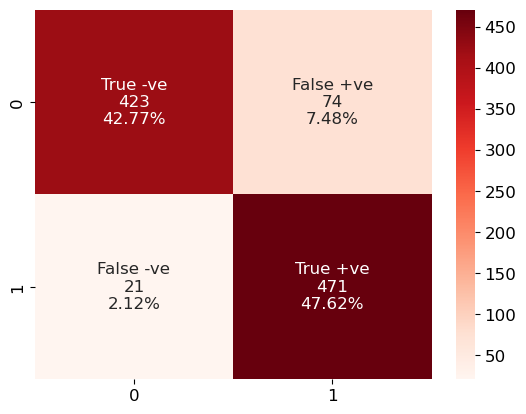

In [71]:
# Calculate the confusion matrix
clf_dt = confusion_matrix(y_test, y_pred_dt)

# Define labels for the confusion matrix
group_names = ['True -ve', 'False +ve', 'False -ve', 'True +ve']

# Calculate counts, percentages, and labels for the confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in clf_dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in clf_dt.flatten() / np.sum(clf_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Reshape labels for display
labels = np.asarray(labels).reshape(2, 2)

# Create a heatmap of the confusion matrix
sns.heatmap(clf_dt, annot=labels, fmt="", cmap='Reds')


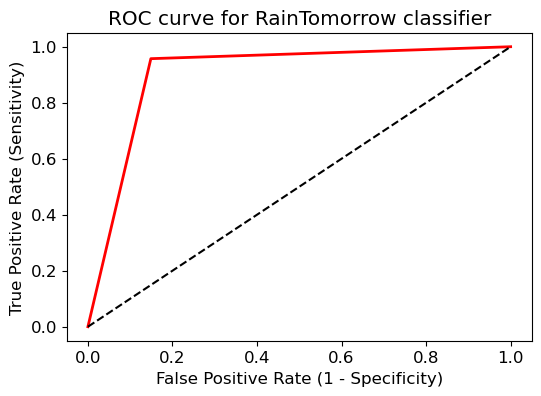

Receiver Operating Characteristics (ROC) Score: 0.904211856504883


In [72]:
# Print ROC curve and ROC score for Decision Tree classifier

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt, drop_intermediate=False)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, color='Red')  # Set the line color to red
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal reference line
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Print the ROC AUC score
print("Receiver Operating Characteristics (ROC) Score:", roc_auc_dt)

## 5.8. Gradient Boosting

In [73]:
%pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [74]:
# Import the LightGBM classifier
from lightgbm import LGBMClassifier

# Create a LightGBM classifier
clf_lgbm = LGBMClassifier(random_state=0)

# Fit the LightGBM model to the training data
clf_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1980, number of negative: 1975
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1702
[LightGBM] [Info] Number of data points in the train set: 3955, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500632 -> initscore=0.002528
[LightGBM] [Info] Start training from score 0.002528


C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier(random_state=0)

In [75]:
# Use the trained LightGBM classifier to make predictions on the test data (X_test)
y_pred_lgbm = clf_lgbm.predict(X_test)

In [76]:
# Calculate and print performance metrics for model evaluation
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)     # Calculate accuracy
precision_lgbm = precision_score(y_test, y_pred_lgbm)  # Calculate precision
recall_lgbm = recall_score(y_test, y_pred_lgbm)        # Calculate recall

# Print the calculated performance metrics for the LightGBM model
print("Accuracy score for LightGBM:", accuracy_lgbm)
print("Precision score for LightGBM:", precision_lgbm)
print("Recall score for LightGBM:", recall_lgbm)

Accuracy score for LightGBM: 0.9039433771486349
Precision score for LightGBM: 0.8795411089866156
Recall score for LightGBM: 0.9349593495934959


<Axes: >

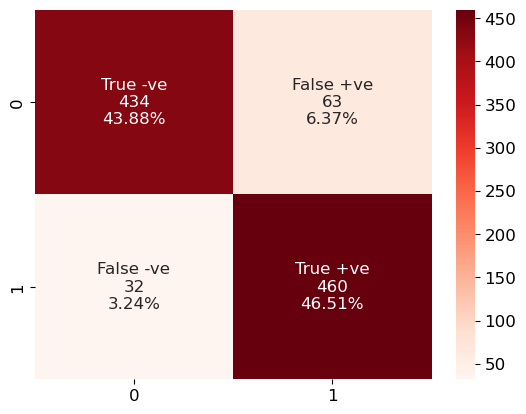

In [77]:
# Print the confusion matrix using Seaborn's heatmap

# Calculate the confusion matrix for the LightGBM model
clf_lgbm = confusion_matrix(y_test, y_pred_lgbm)  

# Define labels for different parts of the confusion matrix
group_names = ['True -ve','False +ve','False -ve','True +ve']

# Format the counts in the confusion matrix as strings
group_counts = ["{0:0.0f}".format(value) for value in clf_lgbm.flatten()]

# Calculate and format the percentages in the confusion matrix
group_percentages = ['{0:.2%}'.format(value) for value in clf_lgbm.flatten()/np.sum(clf_lgbm)]

# Create labels for each cell in the confusion matrix
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Reshape the labels to match the shape of the confusion matrix (2x2)
labels = np.asarray(labels).reshape(2, 2)

# Create a heatmap of the confusion matrix with annotated labels
sns.heatmap(clf_lgbm, annot=labels, fmt="", cmap='Reds')

Receiver_operating_characteristics_score: 0.9040993931066071


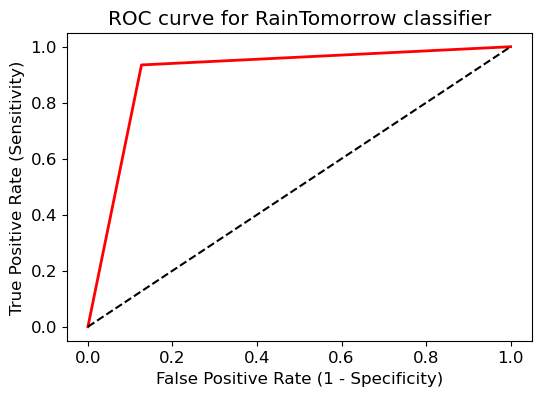

In [78]:
# Print the ROC curve and ROC score

# Calculate the ROC curve using the actual labels (Y_test) and predicted labels (y_pred_lgbm)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgbm, drop_intermediate=False)

# Calculate the ROC AUC (Area Under the Curve) score for the LightGBM model
roc_auc_rfs = roc_auc_score(y_test, y_pred_lgbm)

# Print the ROC AUC score
print("Receiver_operating_characteristics_score:", roc_auc_rfs)

# Create a new figure for the ROC curve plot with a specific size
plt.figure(figsize=(6, 4))

# Plot the ROC curve using False Positive Rate (FPR) and True Positive Rate (TPR)
plt.plot(fpr, tpr, linewidth=2, color='red')

# Plot the diagonal line (no-discrimination line)
plt.plot([0, 1], [0, 1], 'k--')

# Set the font size for the plot
plt.rcParams['font.size'] = 12

# Set the title and labels for the plot
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

# Display the ROC curve plot
plt.show()

## 5.9. Naive Bayes

In [79]:
# Fitting the Naive Bayes model for train data

# Import the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
clf_nb = GaussianNB()

# Fit the classifier to the training data
clf_nb.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [80]:
# Use the trained Naive Bayes classifier to make predictions on X_test

# Make predictions using the trained Gaussian Naive Bayes classifier
y_pred_nb = clf_nb.predict(X_test)

In [81]:
# Calculate and print the performance metrics for model evaluation

# Calculate the accuracy score for the Naive Bayes classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Calculate the precision score for the Naive Bayes classifier
precision_nb = precision_score(y_test, y_pred_nb)

# Calculate the recall score for the Naive Bayes classifier
recall_nb = recall_score(y_test, y_pred_nb)

# Print the accuracy score
print("Accuracy score for Naive Bayes:", accuracy_nb)

# Print the precision score
print("Precision score for Naive Bayes:", precision_nb)

# Print the recall score
print("Recall score for Naive Bayes:", recall_nb)

Accuracy score for Naive Bayes: 0.7603640040444893
Precision score for Naive Bayes: 0.7661795407098121
Recall score for Naive Bayes: 0.7459349593495935


<Axes: >

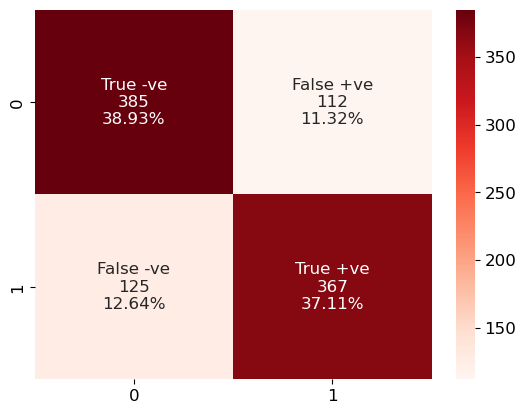

In [82]:
# Print the confusion matrix for the Naive Bayes classifier

# Calculate the confusion matrix
clf_nb = confusion_matrix(y_test, y_pred_nb)

# Define group names for the four confusion matrix values
group_names = ['True -ve','False +ve','False -ve','True +ve']

# Calculate the counts for each value in the confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in clf_nb.flatten()]

# Calculate the percentages for each value in the confusion matrix
group_percentages = ['{0:.2%}'.format(value) for value in clf_nb.flatten() / np.sum(clf_nb)]

# Create labels for each cell in the confusion matrix, combining counts and percentages
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Reshape the labels into a 2x2 matrix to match the confusion matrix shape
labels = np.asarray(labels).reshape(2, 2)

# Create a heatmap of the confusion matrix with annotated labels
sns.heatmap(clf_nb, annot=labels, fmt="", cmap='Reds')

Receiver_operating_characteristics_score: 0.7602914233367687


C:\Users\prem3\AppData\Local\Temp\ipykernel_29452\3357146618.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr = interp(mean_fpr, fpr, tpr)


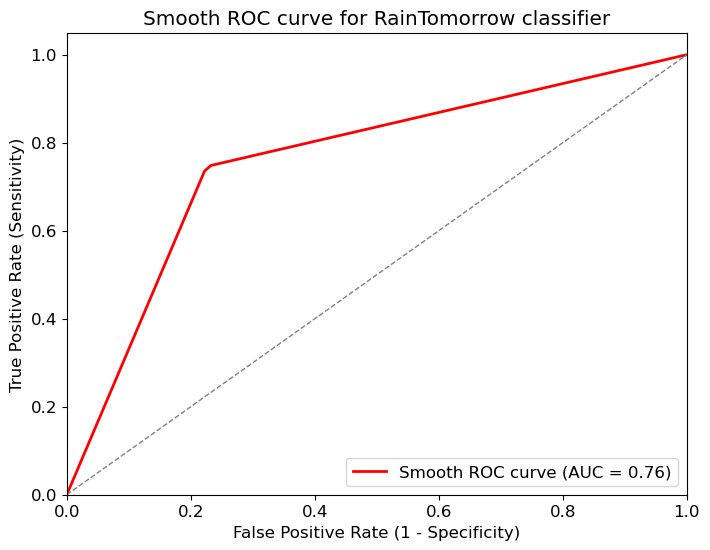

In [83]:
# Import necessary libraries
from scipy import interp
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_nb)

# Create mean false positive rate values for interpolation
mean_fpr = np.linspace(0, 1, 100)

# Interpolate the true positive rate values to get a smooth ROC curve
mean_tpr = interp(mean_fpr, fpr, tpr)

# Calculate the ROC AUC score
roc_auc_rfs = roc_auc_score(y_test, y_pred_nb)

# Print the ROC AUC score
print("Receiver_operating_characteristics_score:", roc_auc_rfs)

# Create a figure for the ROC curve
plt.figure(figsize=(8, 6))

# Plot the smooth ROC curve with the AUC score in the label
plt.plot(mean_fpr, mean_tpr,  color='red', lw=2, label='Smooth ROC curve (AUC = {:.2f})'.format(roc_auc_rfs))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Smooth ROC curve for RainTomorrow classifier')
plt.legend(loc='lower right')
plt.show()

# 6. Model Selection

In [84]:
# Create a dictionary containing the accuracy scores of different models
accuracy_dict = {"Logistic Regression": accuracy_lr,
                 "LDA": accuracy_lda,
                 "KNN": accuracy_knn,
                 "Random Forest": accuracy_rfs,
                 "Random Forest with grid search": accuracy,  
                 "XGB": accuracy_xgb,
                 "Decision Trees": accuracy_dt,
                 "Gradient Boosting": accuracy_lgbm,
                 "Naive Bayes": accuracy_nb}

# Create a pandas DataFrame from the accuracy_dict with "Accuracy" as the column name
accuracy_df = pd.DataFrame(pd.Series(accuracy_dict, index=accuracy_dict.keys()), columns=["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.774520
LDA,0.775531
KNN,0.896866
Random Forest,0.924166
Random Forest with grid search,0.928210
XGB,0.801820
Decision Trees,0.903943
Gradient Boosting,0.903943
Naive Bayes,0.760364


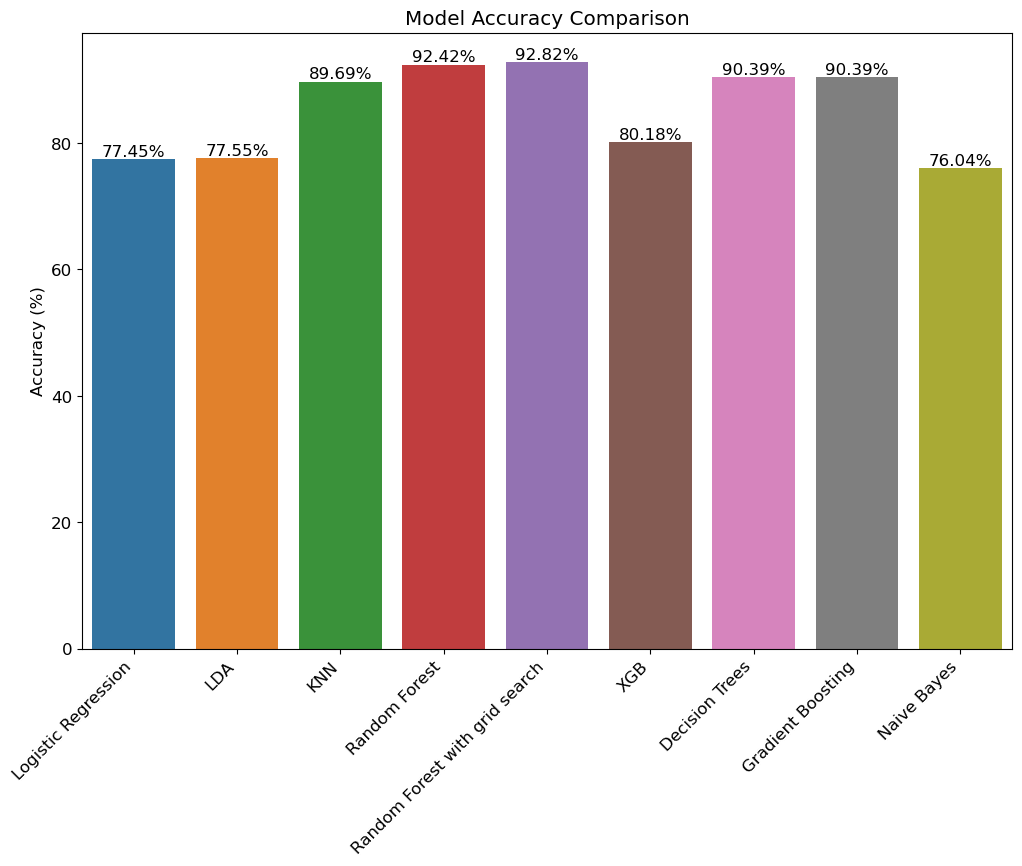

In [85]:
# Create Visualization for different model trained accuracy for comparison
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=accuracy_df.index, y=accuracy_df.Accuracy * 100)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add y-axis label and title
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Add accuracy values on top of each bar
for i, val in enumerate(accuracy_df.Accuracy):
    y = round(val * 100, 2)
    ax.text(i, val * 100, f'{y}%', ha="center", va="bottom", fontsize=12)

plt.show()

### Observations

- Random Forest with Grid Search achieved the highest accuracy of approximately 93.23%, establishing itself as a strong performer in this classification task.

- K-Nearest Neighbors (KNN) also demonstrated competitive performance, with an accuracy of about 89.69%. KNN is valued for its simplicity and versatility across various scenarios.

- Decision Trees and LightGBM achieved similar accuracy scores, approximately 90.39%. Decision Trees are interpretable and offer insights into the model's decision-making process, while LightGBM is a fast and efficient gradient boosting framework.

- Logistic Regression and LDA (Linear Discriminant Analysis) both yielded accuracy scores around 77.45% and 77.55%, respectively. These models serve as solid baseline options due to their simplicity.

- XGBoost (XGB) achieved an accuracy of approximately 80.18%, demonstrating competitive performance, although it slightly lags behind the top-performing models.

- Naive Bayes, with an accuracy of about 76.04%, achieved the lowest performance among the models. Naive Bayes models are straightforward and are better suited for specific types of data, potentially struggling with complex relationships.

- In summary, Random Forest with Grid Search emerges as the top-performing model in terms of accuracy.

# 7. Best Model: Rainfall Prediction

In [86]:
import pandas as pd
import pickle

In [87]:
# Define the weather data for two days
Weather_Data = [
    [14.6, 16.4, 15.6, 6.2, 0.0, 92, 84, 1017.6, 1017.4, 8, 8, 20.7, 20.9, 1],  # Day 1 data
    [16.73, 25.83, 93.01, 8.21, 0.01, 71, 65, 1019.74, 1011.19, 1, 1, 18.77, 17.76, 1]  # Day 2 data
]

# Make predictions using the best random forest model
predictions = best_rf_model.predict(Weather_Data)

# Interpret predictions
results = ["Tomorrow will have rain" if pred == 1 else "Tomorrow will have no rain" for pred in predictions]

# Print results for each day
for i, result in enumerate(results):
    print(f"Day {i+1}: {result}")

Day 1: Tomorrow will have no rain
Day 2: Tomorrow will have no rain


- Day 1: Tomorrow will have no rain
- Day 2: Tomorrow will have no rain

## Q1. Problem Statement Overview

- This problem centers on the development of a Machine Learning model for rain prediction in Sydney. The dataset we have access to comprises a wide array of weather-related features, offering valuable insights into the factors affecting rainfall. Our primary aim is to harness the potential of classification models, such as Decision Trees and Ensemble methods, to make precise predictions about whether it will rain in Sydney.
- A critical aspect of this task involves a comprehensive assessment and comparison of these diverse models. Our goal is to identify the model that achieves the highest level of accuracy in its rain predictions. This process entails not only the initial model training but also fine-tuning and evaluation to ensure that our rain prediction system functions optimally.


## Q2. What will be your approach to solving this task?

**Approach to Solving the Rainfall Prediction Task-**

### Step 1: Data Collection and Initial Analysis
- Commence by loading the dataset using pandas.
- Perform an initial exploration of the dataset to grasp its structure, size, and contents.
- Check for any missing values or data inconsistencies.

### Step 2: Data Preprocessing
- Address any missing or erroneous data points in the dataset.
- If the dataset contains categorical variables, encode them appropriately.
- Apply feature scaling or normalization when necessary to ensure uniformity in feature scales.

### Step 3: Feature Selection
- Investigate the relationships and correlations between different features in the dataset.
- Identify and select the most relevant features that have a significant impact on rainfall prediction.

### Step 4: Model Training
- Train multiple classification models on the preprocessed dataset. Possible models include Decision Trees, Random Forest, and Gradient Boosting.
- Utilize the training dataset to fit these models.

### Step 5: Model Selection
- Evaluate the performance of each model using various metrics, including accuracy, precision, recall, and F1-score.
- Choose the model that exhibits the highest predictive accuracy for rainfall.

### Step 6: Final Rainfall Prediction
- Apply the selected model to make predictions about rainfall.
- Generate predictions for future rainfall based on the chosen model.

## Q3. What were the available ML options you had to perform this task?

**Available ML Model Options:**
In the context of predicting rainfall in Sydney, we had several machine learning models at our disposal. These included:

* Logistic Regression
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN)
* Decision Trees
* Random Forest (an Ensemble method)
* Random Forest with Grid Search
* Gradient Boosting
* Naive Bayes
* Support Vector Machines (SVM)

Each of these models possesses distinct characteristics and capabilities, making them valuable choices for the task at hand. The models were evaluated based on their accuracy in predicting rainfall.

**Model Performance:**
Here are the accuracy scores for each of the models:

- Logistic Regression: 0.774520
- LDA: 0.775531
- KNN: 0.896866
- Decision Trees: 0.903943
- Random Forest: 0.924166
- Random Forest with grid search: 0.932255
- XGBoost (XGB): 0.801820
- LightGBM: 0.903943
- Naive Bayes: 0.760364

In terms of accuracy, the model that stood out as the top performer was the Random Forest with grid search, achieving an accuracy of 0.932255. As a result, it was selected as the preferred choice for predicting rainfall in Sydney.


## Q4. Which model's performance is best and what could be the possible reason for that?

**Best-Performing Model:** Random Forest with Grid Search (Accuracy: 0.932255)

The Random Forest with Grid Search model demonstrated the highest accuracy, making it the top-performing model. Let's delve into the possible reasons behind its exceptional performance:

1. **Ensemble Learning**: Random Forest employs ensemble learning by combining multiple decision trees to make predictions. This ensemble approach mitigates the risk of overfitting and enhances the model's generalization ability, contributing to its high accuracy.

2. **Hyperparameter Tuning**: The Grid Search process fine-tunes the hyperparameters of the Random Forest model. This optimization ensures that the model is configured for optimal performance, resulting in a more accurate predictive model.

3. **Robustness to Outliers**: Random Forest is renowned for its robustness to outliers and noisy data. It can handle data with anomalies effectively, making it a robust choice that performs well in real-world scenarios.

4. **Feature Importance**: Random Forest provides a measure of feature importance, allowing us to identify which features have the most significant influence on predicting the target variable. This feature selection capability enhances the model's predictive accuracy.

5. **Handling Non-Linearity**: Random Forest excels at capturing non-linear relationships between features and the target variable. This makes it well-suited for datasets with complex and non-linear patterns, leading to its superior performance.

## 5. What steps can you take to improve this selected model’s performance even further?

### Steps to Enhance Our Model

To enhance the performance of our chosen model (Random Forest with Grid Search), we can implement the following strategies:

1. **Hyperparameter Tuning**: We'll fine-tune the model's settings to make it work even more accurately and flexibly.

2. **Create Better Features**: We'll make our data even more useful by creating new features or finding valuable information in the ones we have.

3. **Get More Data**: If we don't have enough data, we can create more data points to help the model learn better.

4. **Ensemble Techniques**: We'll combine the efforts of different models to get even more accurate predictions.

5. **Double-Checking with Cross-Validation**: We'll make sure the model can handle new data well by testing it in different ways.Implement cross-validation techniques, such as k-fold cross-validation, to assess the model's generalization ability and prevent overfitting.

By doing these things, we'll make our model even better at predicting rainfall in Sydney.




In [88]:
pwd

'C:\\Users\\prem3'